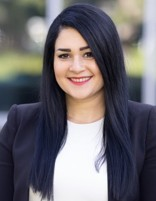
---
---
---


### Project Title: Capstone Project Milestone Submission
### Prepared by: Sona Shakoory
### Program: MIT Professional Education – Applied Data Science & Generative AI
### Practical Data Science: Loan Default Prediction
---
---

## **Problem Definition**

### Context
- Loan defaults reduce bank profitability, especially for home equity loans.
- Current approval processes are manual, time-consuming, and susceptible to human error and bias.
- A scalable, objective, and data-driven solution is needed to reduce default risk and improve efficiency.

### Objective
- Build a **classification model** to predict the likelihood of a client defaulting on a loan.
- Provide interpretable recommendations on the key features that influence default risk.
- Align the model with the Equal Credit Opportunity Act (ECOA) by ensuring fairness and transparency.

### Key Questions:
- Which features most strongly predict loan defaults?
- Can we build a model that is both **accurate and interpretable**?
- How can we integrate the model into the underwriting process without perpetuating human biases?

### Problem Formulation:
- This is a **binary classification problem** where:
  - `BAD = 1`: Client defaulted on the loan
  - `BAD = 0`: Client repaid the loan
- Use predictive modeling techniques on historical applicant data to:
  - **Predict default risk**
  - **Support decision-making** for loan approvals

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score

from sklearn import metrics

from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

# For tuning the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the dataset**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ld=pd.read_csv("/content/drive/MyDrive/Capstone Project/hmeq.csv")

In [4]:
# Copying data to another variable to avoid any changes to original data
data=ld.copy()

In [5]:
# Displaying first five rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [6]:
# Displaying last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [7]:
# Checking the shape of the data
data.shape

(5960, 13)

In [8]:
# Checking info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


---

**Dataset Overview**

* Total Records: 5,960 rows
* Total Features: 13 columns
* Data Types:
 * Numeric: 11 columns (9 float64, 2 int64)
 * Categorical (object): 2 columns (Reason, Job)
* Missing Data:
 * 11 out of 13 columns contain missing values
* Notably missing (by number of nulls):
 * MORTDUE: 518 missing
 * VALUE: 112 missing
 * YOJ: 379 missing
 * DEROG: 708 missing
 * DEBTINC: 1,267 missing (most missing)
* Target Variable: BAD (likely binary for loan default or similar)

---

In [9]:
# Analyzing missing values
(data.isnull().sum())

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
# Checking the percentage of missing values in the each column.
(data.isnull().sum()/data.shape[0] * 100)

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

---

**Missing Data Summary**

- **~5% Missing**: `VALUE`, `REASON`, `JOB`, `CLAGE`, `CLNO`  
- **~10% Missing**: `MORTDUE`, `YOJ`, `DELINQ`, `NINQ`  
- **>20% Missing**: `DEBTINC`  
- **Total Impact**: 10 out of 13 columns contain missing values
----

In [11]:
# Check for duplicated rows
duplicate_rows = data.duplicated()

# Summary of duplicates
print(f"Total duplicated rows: {duplicate_rows.sum()}")

Total duplicated rows: 0


### **Convert the data types**

In [12]:
# Select categorical columns (object type)
cols = data.select_dtypes(include=['object']).columns.tolist()

# Add target variable 'BAD' as it's categorical in this classification task
cols.append('BAD')

In [138]:
cols

['REASON', 'JOB', 'BAD']

In [13]:
# Changing the data type of object type column to category.

for i in cols:
    data[i] = data[i].astype("category")

In [14]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Summary Statistics**

In [15]:
# Summary statistics for numerical variables
data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

---
**Insights from Numerical Summary**

- **Presence of Extreme Outliers**  : All numerical variables exhibit significantly high maximum values relative to their means and medians, indicating the presence of strong outliers.

- **Loan and Property-Related Outliers**  : Features like `LOAN`, `MORTDUE`, and `VALUE` show disproportionately high maximums, suggesting a small group of customers with very large loans or high-value properties.

- **Credit Behavior Anomalies**  : `DELINQ` (number of delinquencies) ranges up to **15** while the median is **0**, indicating a small number of borrowers with repeated missed payments.

- **Debt-to-Income Ratio Concerns** : `DEBTINC` shows a mean of **~34** and a maximum exceeding **200**, which is unusually high for a ratio intended to reflect debt relative to income.  
  This raises **data integrity concerns** and warrants further validation or transformation before analysis.

  ---


In [16]:
 # Checking summary statistics for categorical variables

data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

---

**Categorical Data Insights**

- `BAD` has two categories:
  - **0 (No default)**: ~80% of clients
  - **1 (Defaulted)**: ~20% of clients

- `REASON`:
  - ~69% of clients request loans to **consolidate other debts**

- `JOB`:
  - **"Other"** accounts for 42% of job types, suggesting limited job category granularity

---

In [17]:
# Checking the count of unique values in each categorical column

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*40)

Unique values in BAD are :
BAD
0    0.800503
1    0.199497
Name: proportion, dtype: float64
****************************************
Unique values in REASON are :
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
****************************************
Unique values in JOB are :
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64
****************************************


---

**Proportional breakdowns of key categorical variables**

* Target Variable (`BAD`)
 *  **~80%** non-default (`BAD = 0`), **~20%** default (`BAD = 1`)
 * This confirms class imbalance, which is crucial for modeling .We may require stratified sampling, balanced metrics (e.g., F1-score), or resampling techniques (e.g., SMOTE)

* Loan Purpose (`REASON`)
 * ~69% request loans for debt consolidation (DebtCon), ~31% for home improvement (HomeImp)
 * This shows dominance of a single loan reason, and we may consider checking if default rates differ by loan purpose
and using REASON as a predictor for credit risk

* Job Category (`JOB`)
 * The largest group is "Other" (42%), followed by Professional/Executive and Office roles
 * Categories like Sales and Self-employed are underrepresented

 ---

## **Exploratory Data Analysis (EDA) and Visualization**

---
**What is the range of values for the loan amount variable "LOAN"?**

---

In [18]:
# Range of LOAN values
loan_min = data['LOAN'].min()
loan_max = data['LOAN'].max()
print(f"LOAN ranges from ${loan_min:,.0f} to ${loan_max:,.0f}")

LOAN ranges from $1,100 to $89,900


---

**How does the distribution of years at present job "YOJ" vary across the dataset?**

---

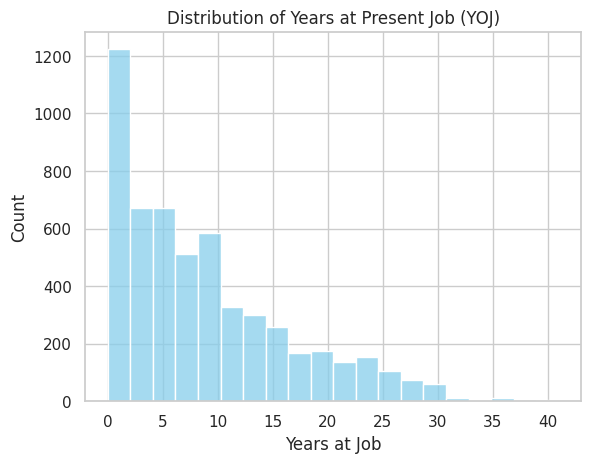

In [19]:
# Set style
sns.set_style("whitegrid")
# Distribution of YOJ with customized x-axis ticks
sns.histplot(data['YOJ'].dropna(), bins=20, kde=False, color='skyblue')
plt.title('Distribution of Years at Present Job (YOJ)')
plt.xlabel('Years at Job')
plt.ylabel('Count')
plt.xticks(ticks=range(0, 45, 5))  # Show ticks at every 5 years from 0 to 40
plt.show()

---

The distribution of YOJ (Years at Present Job) is right-skewed, indicating that most applicants have relatively short job tenure. A significant proportion of borrowers have less than 5 years at their current job, with a sharp drop-off after 10 years. This insight highlights potential employment instability among a large portion of the applicant pool, which may be a useful indicator of credit risk when building predictive models.

---

**How many unique categories are there in the REASON variable?**

---

In [20]:
# Unique categories in REASON
unique_reasons = data['REASON'].nunique(dropna=True)
print(f"There are {unique_reasons} unique categories in the REASON variable.")
print(data['REASON'].value_counts(dropna=False))

There are 2 unique categories in the REASON variable.
REASON
DebtCon    3928
HomeImp    1780
NaN         252
Name: count, dtype: int64


---

**What is the most common category in the JOB variable?**

---

In [21]:
# Most common JOB category
most_common_job = data['JOB'].value_counts(dropna=False).idxmax()
count = data['JOB'].value_counts(dropna=False).max()
print(f"The most common JOB category is '{most_common_job}' with {count} applicants.")

The most common JOB category is 'Other' with 2388 applicants.


---

**Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?**

---

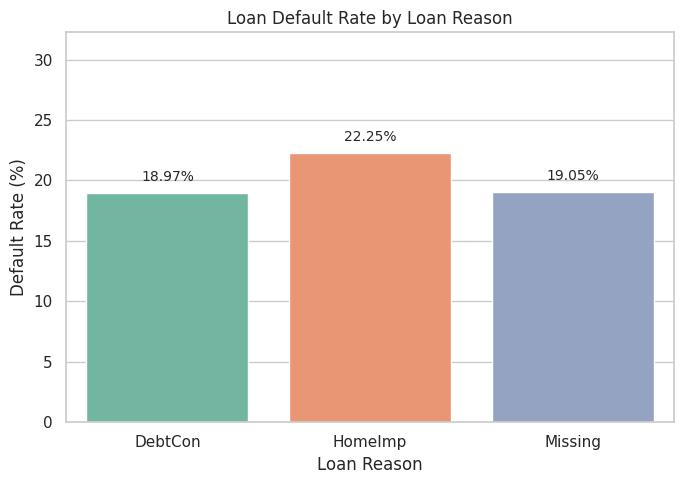

In [22]:
# Copy the data and clean REASON
data = data.copy()

# Ensure REASON_LABEL is string and 'Missing' is filled
data['REASON_LABEL'] = data['REASON'].astype(str).replace('nan', 'Missing')

# Convert BAD to float if needed
data['BAD'] = data['BAD'].astype(float)

# Group and aggregate
reason_summary = (
    data.groupby('REASON_LABEL', as_index=False)['BAD']
    .mean()
    .rename(columns={'BAD': 'Default Rate'})
)
reason_summary['Percentage'] = (reason_summary['Default Rate'] * 100).round(2)

# Plot
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=reason_summary, x='REASON_LABEL', y='Percentage', palette='Set2')

# Annotate bars
for i, row in reason_summary.iterrows():
    ax.text(i, row['Percentage'] + 1, f"{row['Percentage']}%", ha='center', fontsize=10)

plt.title("Loan Default Rate by Loan Reason", fontsize=12)
plt.xlabel("Loan Reason")
plt.ylabel("Default Rate (%)")
plt.ylim(0, reason_summary['Percentage'].max() + 10)
plt.tight_layout()
plt.show()

---

**Home Improvement Loans (HomeImp)** Default Rate: ~22.25% This group has the highest likelihood of defaulting, indicating that applicants requesting loans for home improvement may be riskier borrowers.

**Debt Consolidation Loans (DebtCon)** Default Rate: ~18.97% Slightly lower default rate, suggesting these applicants may be more focused on managing or paying down existing obligations.

**Missing Loan Reason (NaN)** Default Rate: ~19.05% Even though the reason is unknown, this group shows similar risk levels to DebtCon, but the variability makes it less reliable without more information.

---

---

**Do applicants who default have a significantly different loan amount compared to those who repay their loan?**

---

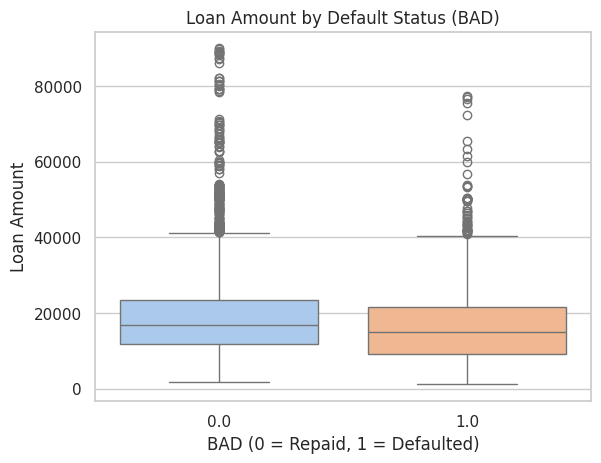

T-test p-value: 0.0000


In [23]:
# Compare LOAN amounts by BAD
sns.boxplot(x='BAD', y='LOAN', data=data, palette='pastel')
plt.title('Loan Amount by Default Status (BAD)')
plt.xlabel('BAD (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Loan Amount')
plt.show()

# Optional: statistical test
from scipy.stats import ttest_ind
loan_default = data[data['BAD'] == 1]['LOAN'].dropna()
loan_repaid = data[data['BAD'] == 0]['LOAN'].dropna()
t_stat, p_val = ttest_ind(loan_default, loan_repaid, equal_var=False)
print(f"T-test p-value: {p_val:.4f}")


---

The analysis confirms a statistically significant difference in loan amounts between applicants who defaulted and those who repaid, as evidenced by a p-value of 0.0000. The boxplot illustrates that defaulters generally had slightly higher median loan amounts and a wider distribution with more extreme outliers. This suggests a potential link between larger loan sizes and increased default risk. From a risk management perspective, this insight supports incorporating loan amount as a key variable in credit scoring and underwriting models to better identify high-risk applicants.

---

---

**Is there a correlation between the value of the property and the loan default rate?**

---

In [24]:
# Correlation between VALUE and BAD
corr_value_bad = data[['VALUE', 'BAD']].corr().iloc[0,1]
print(f"Correlation between VALUE and BAD: {corr_value_bad:.4f}")

Correlation between VALUE and BAD: -0.0300


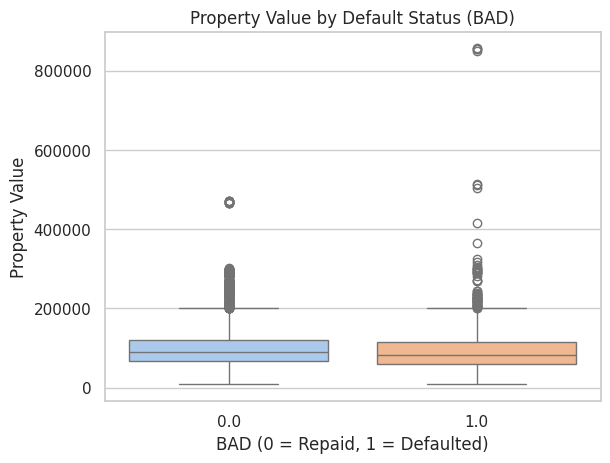

In [25]:
# Drop missing values for VALUE and BAD
value_data = data[['VALUE', 'BAD']].dropna()

# Boxplot
sns.boxplot(x='BAD', y='VALUE', data=value_data, palette='pastel')
plt.title('Property Value by Default Status (BAD)')
plt.xlabel('BAD (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Property Value')
plt.show()

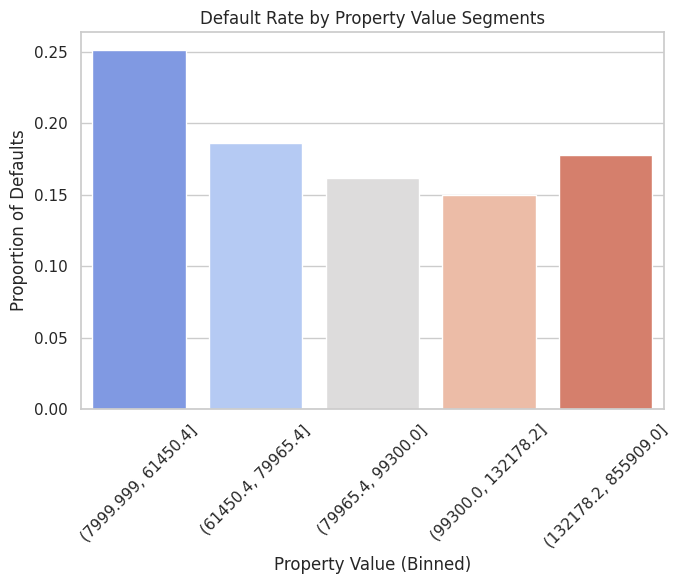

In [26]:
# Bin the VALUE column
data['VALUE_BIN'] = pd.qcut(data['VALUE'], q=5, duplicates='drop')  # quintiles

# Calculate default rate per bin
value_bin_default_rate = data.groupby('VALUE_BIN')['BAD'].mean().reset_index()

# Barplot
plt.figure(figsize=(7, 6))
sns.barplot(x='VALUE_BIN', y='BAD', data=value_bin_default_rate, palette='coolwarm')
plt.title('Default Rate by Property Value Segments')
plt.xlabel('Property Value (Binned)')
plt.ylabel('Proportion of Defaults')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

The analysis shows a weak negative correlation between property value (VALUE) and loan default status (BAD), with a Pearson correlation coefficient of -0.0300. While statistically weak, this relationship is supported by visual evidence:

* The boxplot indicates that defaulters tend to own properties with lower median values compared to those who repaid their loans.

* The binned bar chart further reinforces this, showing that default rates are highest among applicants with property values below ~$61,500, reaching over 24%.

* As property values increase, default rates generally decline—reaching the lowest levels in the (93-132)K range—before slightly increasing again at the top value segment (>$132K), suggesting a mild non-linear pattern.

---

---

**Do applicants who default have a significantly different mortgage amount (MORTDUE) compared to those who repay?**

---

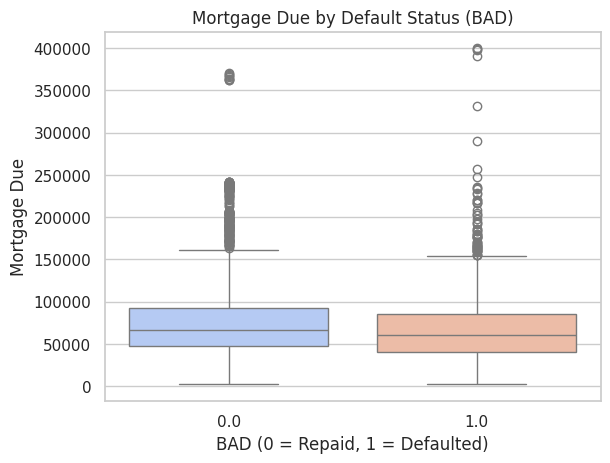

T-test p-value: 0.0007


In [27]:
# Compare MORTDUE by default status
sns.boxplot(x='BAD', y='MORTDUE', data=data, palette='coolwarm')
plt.title('Mortgage Due by Default Status (BAD)')
plt.xlabel('BAD (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Mortgage Due')
plt.show()

# Optional: statistical test
mort_default = data[data['BAD'] == 1]['MORTDUE'].dropna()
mort_repaid = data[data['BAD'] == 0]['MORTDUE'].dropna()
t_stat, p_val = ttest_ind(mort_default, mort_repaid, equal_var=False)
print(f"T-test p-value: {p_val:.4f}")


---

The analysis indicates a statistically significant difference in mortgage balances (MORTDUE) between defaulters and non-defaulters, with a p-value of 0.0007. As shown in the boxplot, borrowers who defaulted tend to have lower median mortgage amounts compared to those who repaid. Despite the overlapping distributions and outliers in both groups, the results suggest that lower outstanding mortgage balances may be associated with increased default risk. This could reflect financial stress among borrowers with less equity or nearing loan maturity.

---

### **Univariate Analysis - Numerical Data**


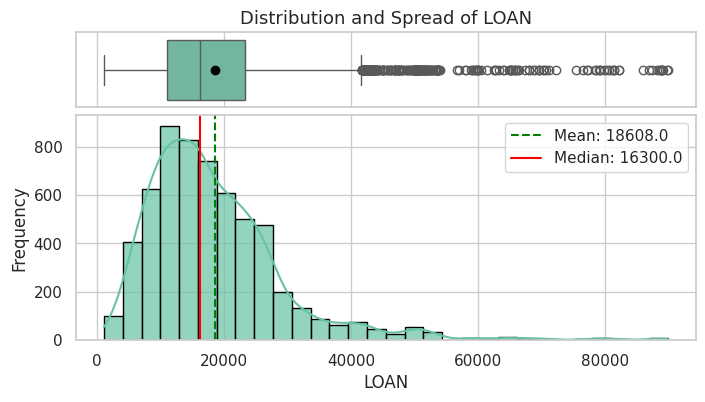

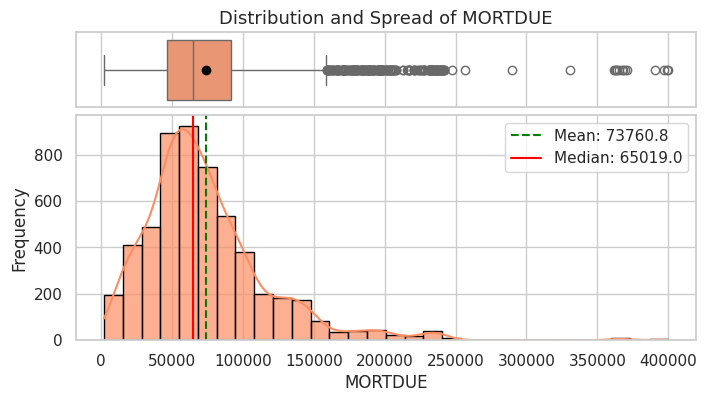

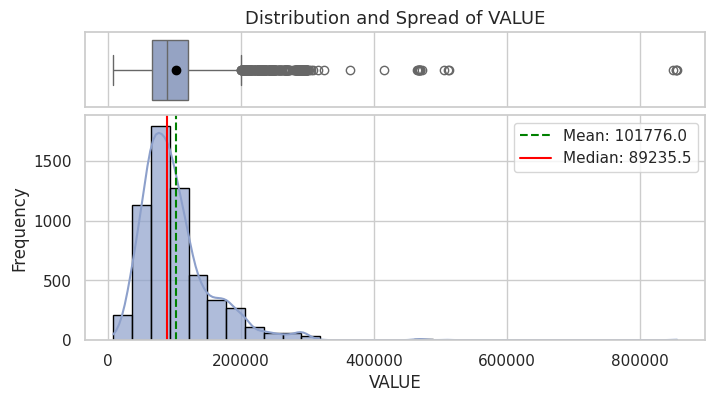

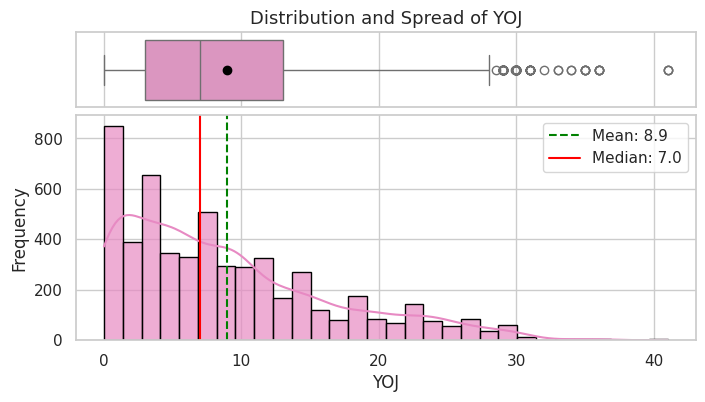

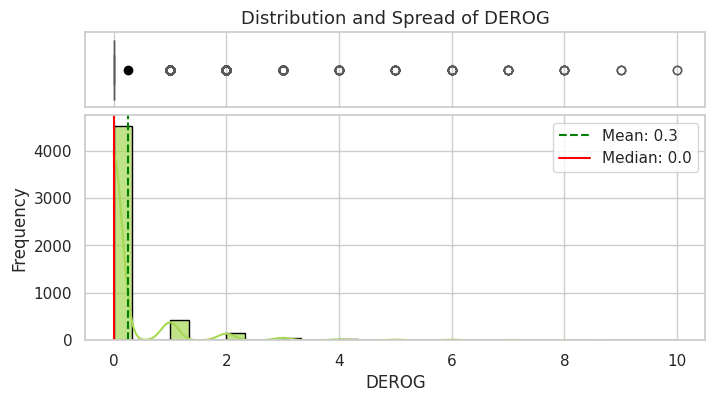

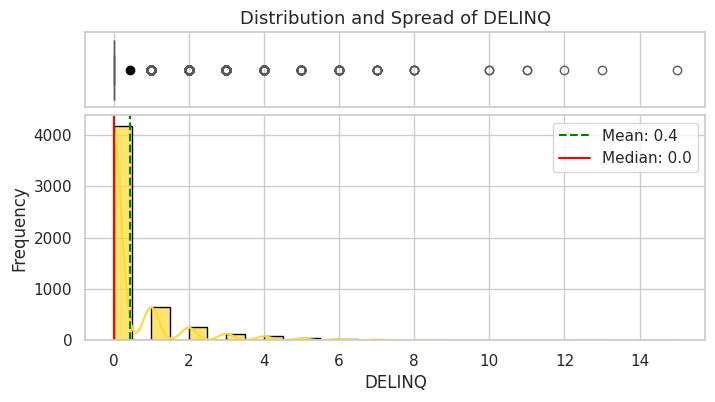

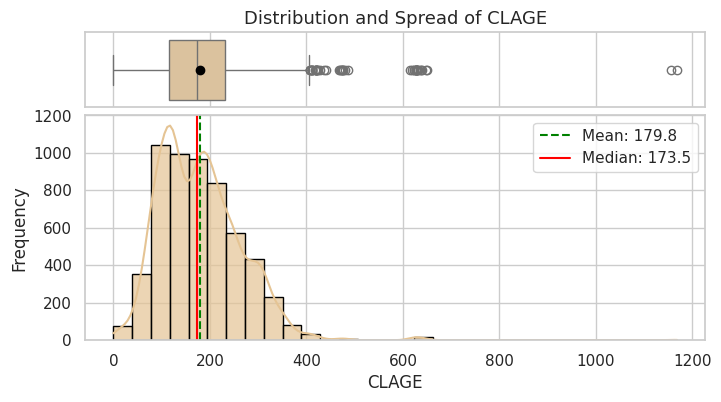

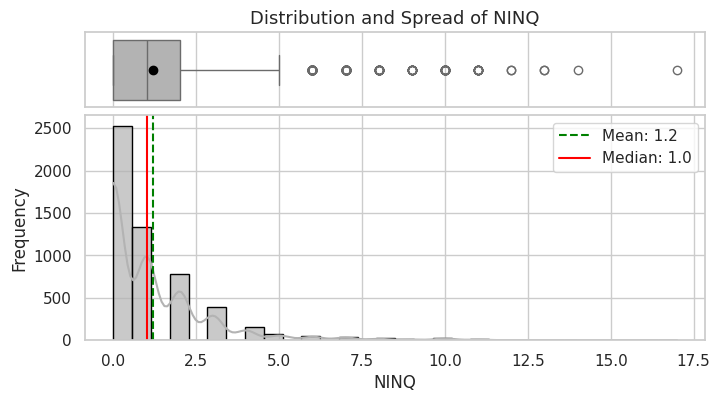

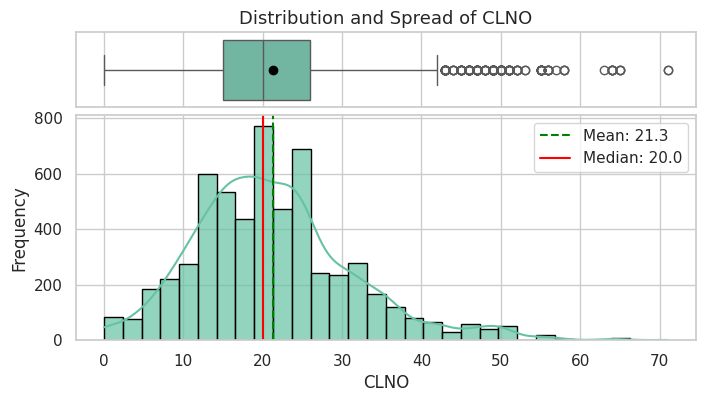

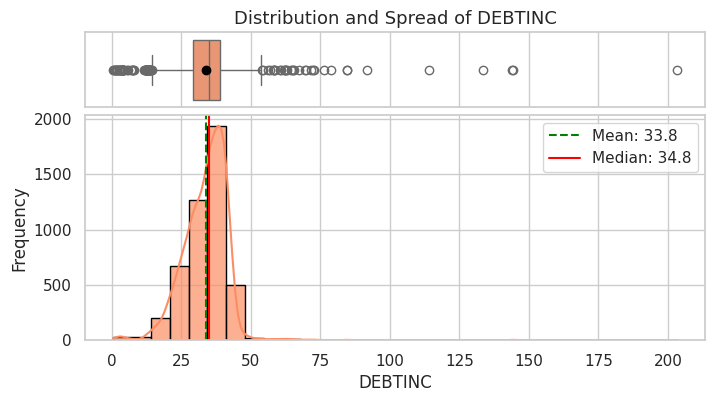

In [28]:
# Set style
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set2", n_colors=10)  # Bright, clear colors

# Numerical columns
num_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
            'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Function to plot combined histogram and boxplot
def histogram_with_boxplot(data, column, color, bins=30):
    """
    Draws a histogram and boxplot in a combined vertical layout for one numerical column.
    Uses bright, distinct colors per variable.
    """
    fig = plt.figure(figsize=(8, 4))
    gs = fig.add_gridspec(2, 1, height_ratios=(0.25, 0.75), hspace=0.05)

    # Boxplot on top
    ax_box = fig.add_subplot(gs[0])
    sns.boxplot(x=data[column], ax=ax_box, color=color, showmeans=True,
                meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"})
    ax_box.set(xlabel='', ylabel='')
    ax_box.set_title(f'Distribution and Spread of {column}', fontsize=13)
    ax_box.tick_params(bottom=False, labelbottom=False)

    # Histogram below
    ax_hist = fig.add_subplot(gs[1], sharex=ax_box)
    sns.histplot(data[column], bins=bins, kde=True, ax=ax_hist, color=color, edgecolor='black', alpha=0.7)
    ax_hist.axvline(data[column].mean(), color='green', linestyle='--', label=f'Mean: {data[column].mean():.1f}')
    ax_hist.axvline(data[column].median(), color='red', linestyle='-', label=f'Median: {data[column].median():.1f}')
    ax_hist.set_xlabel(column)
    ax_hist.set_ylabel('Frequency')
    ax_hist.legend()

    plt.tight_layout()
    plt.show()

# Loop through numeric columns with individual colors
for i, col in enumerate(num_cols):
    histogram_with_boxplot(data, col, color=color_palette[i])

---

**Distribution Insights of Numerical Features**

* **LOAN, MORTDUE, VALUE**
All three variables are right-skewed with extreme outliers. This suggests a small subset of clients take significantly larger loans or have high-value properties. We may benefit from log transformation to normalize distribution on these features.

* **YOJ (Years at Job)**
Heavily right-skewed with most values clustered at lower durations. Indicates a concentration of clients with shorter job tenures; relevant for stability assessment.

* **DEROG and DELINQ** Discrete, right-skewed variables with a high number of zeros and a long tail of rare events. Useful for flagging higher credit risk clients based on historical derogatory or delinquent behavior.

* **CLAGE (Oldest Credit Line Age)** Roughly bell-shaped distribution with bimodal pattern, indicating two dominant age groups. This feature may represent different borrower segments (e.g., new vs. seasoned credit users).

* **NINQ (Recent Inquiries)** Strongly right-skewed, with most clients having few or no recent inquiries. High values may signal aggressive credit seeking—potential risk indicator.

* **CLNO (Total Credit Lines)** Approaches a normal distribution but with slight right skew. Indicates reasonable variability in total lines of credit, useful for credit exposure analysis.

* **DEBTINC (Debt-to-Income Ratio)** Appears normally distributed as well, but with outliers on both extremes. Critical for affordability modeling; We may need capping or transformation of extreme values.

---

### **Univariate Analysis - Categorical Data**

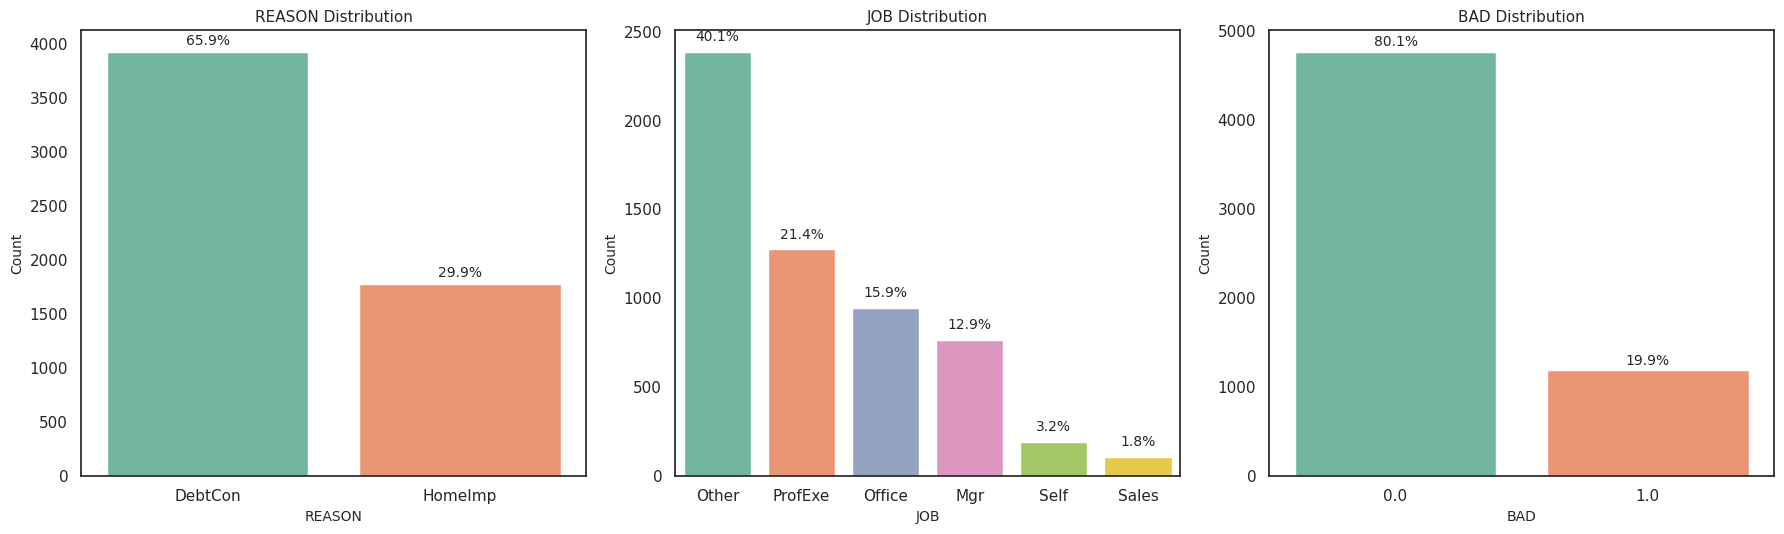

In [32]:
# Set style
sns.set_style("white")

def perc_on_bar(ax, data, feature):
    """
    Annotates a barplot with percentages on top of each bar.

    Parameters:
    - ax: matplotlib Axes object
    - data: DataFrame containing the feature
    - feature: str, name of the categorical variable
    """
    total = len(data[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y + 0.01 * total), ha='center', fontsize=10)

# Plotting smaller, brighter barplots in one row
categorical_cols = ['REASON', 'JOB', 'BAD']
n_cols = len(categorical_cols)

fig, axes = plt.subplots(1, n_cols, figsize=(6 * n_cols, 5.5))

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=data, x=col, ax=ax, order=data[col].value_counts().index, palette="Set2")
    ax.set_title(f'{col} Distribution', fontsize=11)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    perc_on_bar(ax, data, col)

plt.tight_layout()
plt.show()

---

**Loan Purpose (REASON)**: The majority of applicants (≈66%) request loans for debt consolidation (DebtCon), while ~30% cite home improvement (HomeImp). This suggests that managing existing debt is the primary driver for seeking credit.

**Employment Type (JOB)**: The distribution is highly imbalanced. "Other" accounts for the largest share (~40%), followed by Professional/Executive (21%) and Office roles (16%). Niche categories like Sales and Self-employed are underrepresented, indicating potential for consolidation or further scrutiny in modeling.

**Default Status (BAD)**: There is a clear class imbalance, with ~80% of applicants repaying their loans (BAD = 0) and ~20% defaulting (BAD = 1). This imbalance must be addressed in predictive modeling (e.g., via stratified sampling or resampling techniques).

---


## **Bivariate Analysis**

### **Distribution of a numerical variable across the two default status groups**

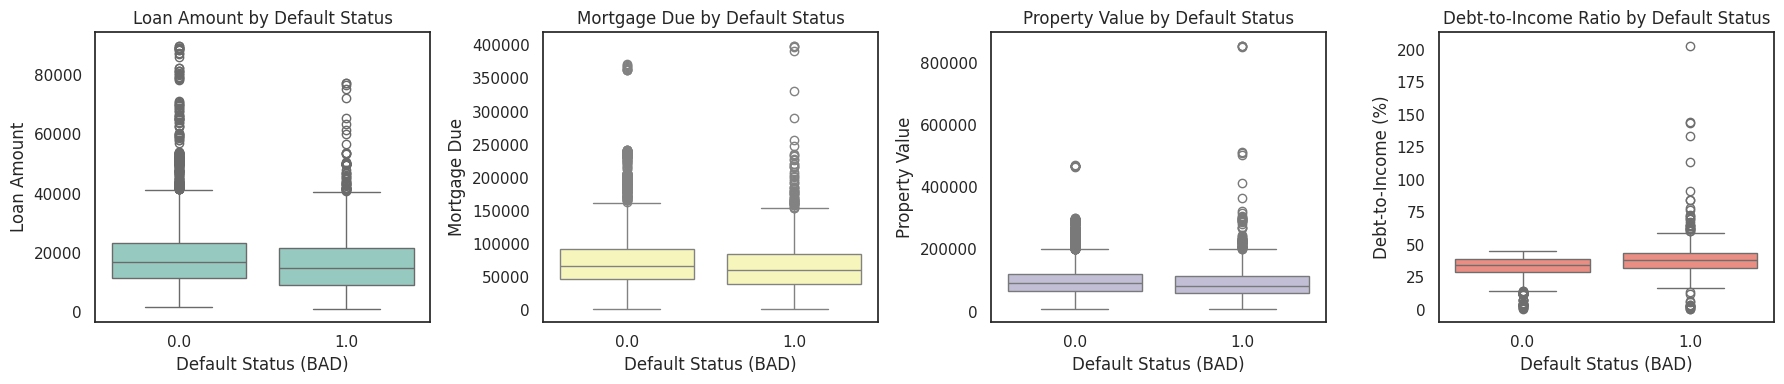

In [33]:
# Loan Default Analysis: Boxplots by Default Status
# This section compares key financial variables by default status (BAD: 0 = Repaid, 1 = Defaulted)

fig, axes = plt.subplots(1, 4, figsize=(18, 4), sharey=False)
sns.set_style("whitegrid")  # clean background

# Boxplot 1: Loan Amount
sns.boxplot(x='BAD', y='LOAN', data=data, ax=axes[0], color="#8dd3c7")
axes[0].set_title('Loan Amount by Default Status')
axes[0].set_xlabel('Default Status (BAD)')
axes[0].set_ylabel('Loan Amount')

# Boxplot 2: Mortgage Due
sns.boxplot(x='BAD', y='MORTDUE', data=data, ax=axes[1], color="#ffffb3")
axes[1].set_title('Mortgage Due by Default Status')
axes[1].set_xlabel('Default Status (BAD)')
axes[1].set_ylabel('Mortgage Due')

# Boxplot 3: Property Value
sns.boxplot(x='BAD', y='VALUE', data=data, ax=axes[2], color="#bebada")
axes[2].set_title('Property Value by Default Status')
axes[2].set_xlabel('Default Status (BAD)')
axes[2].set_ylabel('Property Value')

# Boxplot 4: Debt-to-Income Ratio
sns.boxplot(x='BAD', y='DEBTINC', data=data, ax=axes[3], color="#fb8072")
axes[3].set_title('Debt-to-Income Ratio by Default Status')
axes[3].set_xlabel('Default Status (BAD)')
axes[3].set_ylabel('Debt-to-Income (%)')

plt.tight_layout()
plt.show()

---

**Bivariate Analysis of Default Status vs Financial Variables**

* **Loan Amount**

 * Defaulters (BAD=1) exhibit slightly higher loan amounts than non-defaulters.
 * Distribution is right-skewed with several large outliers, indicating a few high-risk loans.

* **Mortgage Due**
Median mortgage amounts are similar across both groups, but defaulters show a wider spread and more extreme values. This suggests mortgage size alone isn’t a strong predictor, but large obligations may increase risk.

* **Property Value** Property values are broadly comparable between groups, though defaulters have more high-end outliers.These findings indicate limited correlation between asset value and repayment reliability.

* **Debt-to-Income Ratio (DEBTINC)**

 * Clear separation between defaulters and non-defaulters.
 * Defaulters tend to have higher DTI ratios, with more frequent and extreme outliers.
 * High DTI is a strong indicator of default risk and should be emphasized in credit assessments.

---

### **Bivariate Analysis – Continuous Variables**

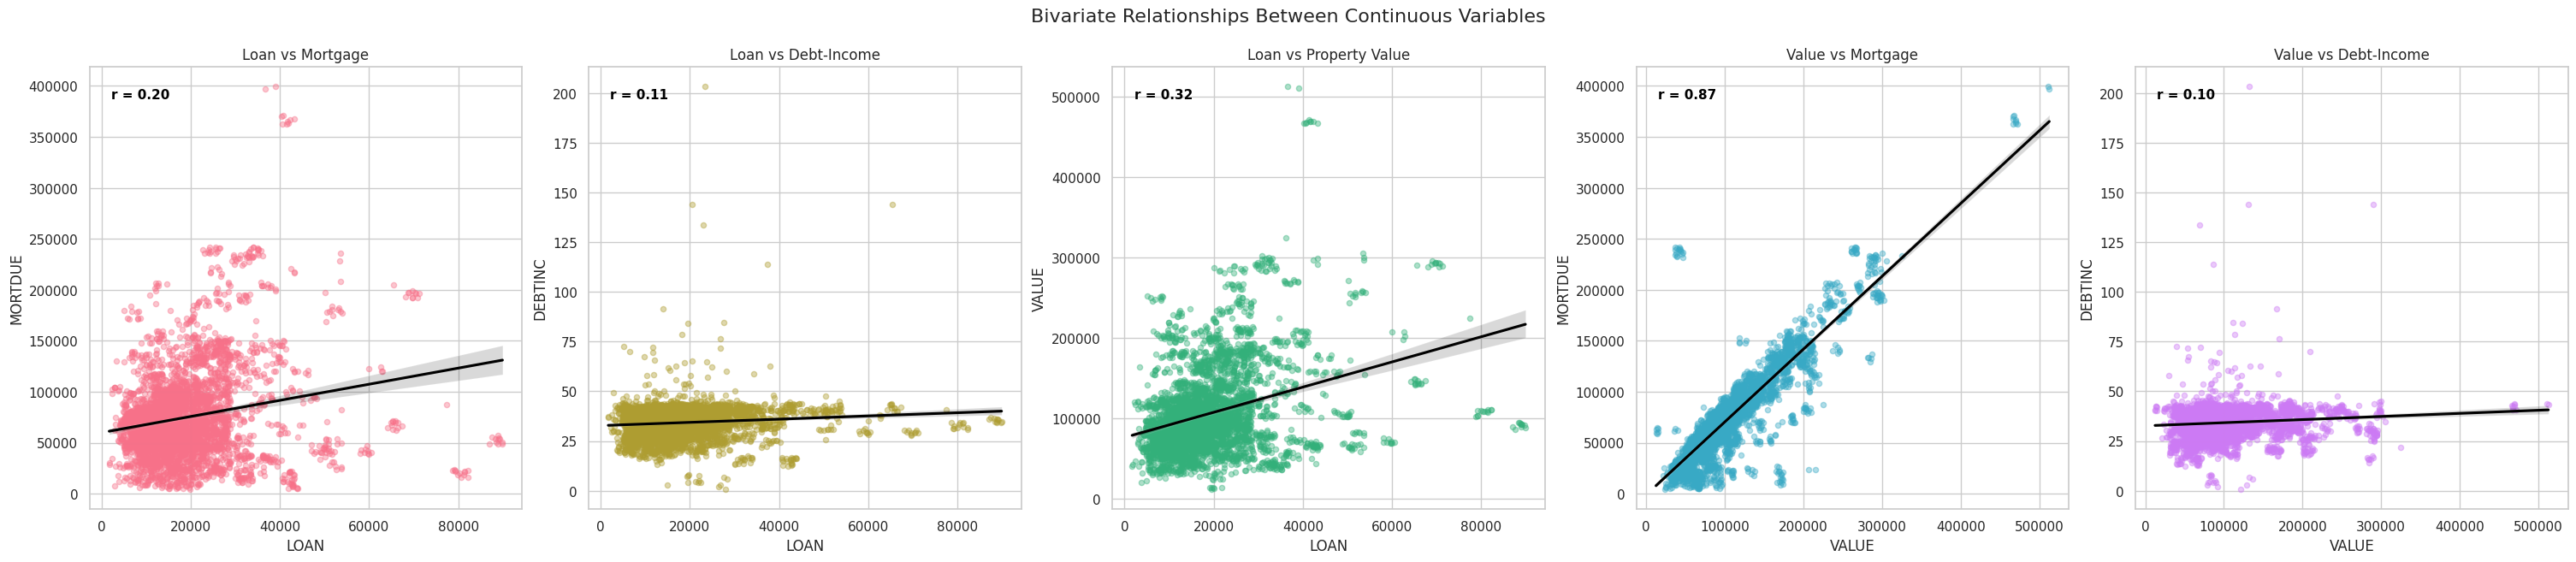

In [34]:
from scipy.stats import pearsonr

# Drop rows with missing values for the selected pairs
data = data.dropna(subset=['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC'])

# Set style and color palette
sns.set_style("whitegrid")
colors = sns.color_palette("husl", 5)

# Define variable pairs and titles
scatter_pairs = [
    ("LOAN", "MORTDUE", "Loan vs Mortgage"),
    ("LOAN", "DEBTINC", "Loan vs Debt-Income"),
    ("LOAN", "VALUE", "Loan vs Property Value"),
    ("VALUE", "MORTDUE", "Value vs Mortgage"),
    ("VALUE", "DEBTINC", "Value vs Debt-Income")
]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(30, 6), constrained_layout=True)

# Generate plots
for i, (x, y, title) in enumerate(scatter_pairs):
    ax = axes[i]
    sns.regplot(data=data, x=x, y=y, ax=ax, color=colors[i], scatter_kws={'alpha':0.4, 's':20}, line_kws={'color':'black'})
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

    # Calculate and annotate Pearson correlation
    corr, _ = pearsonr(data[x], data[y])
    ax.annotate(f"r = {corr:.2f}", xy=(0.05, 0.95), xycoords="axes fraction",
                fontsize=11, fontweight='bold', color='black', ha='left', va='top')

# Add overall title
plt.suptitle("Bivariate Relationships Between Continuous Variables", fontsize=16, y=1.07)
plt.show()

---

**Bivariate Analysis of Continuous Variables**

* **Loan vs Mortgage Due** (r = 0.20): A weak positive correlation suggests that while higher loan amounts are generally associated with higher mortgage dues, the relationship is not strong, indicating other influencing factors.

* **Loan vs Debt-to-Income Ratio** (r = 0.11): A very weak positive correlation implies minimal linear relationship between loan size and a borrower’s debt burden, highlighting the need to assess DTI independently in underwriting.

* **Loan vs Property Value** (r = 0.32): A modest positive relationship exists—larger loans tend to be backed by higher-valued properties, though variability remains significant.

* **Property Value vs Mortgage Due** (r = 0.87): A strong linear correlation indicates that property value is a key driver of mortgage amount, reinforcing its importance in collateral evaluation and risk modeling.

* **Property Value vs Debt-to-Income Ratio** (r = 0.10): Minimal correlation indicates that property value has limited explanatory power regarding borrower income dynamics.

---


### **Bivariate Analysis:  Default Rates by Categorical Variables (REASON & JOB)**


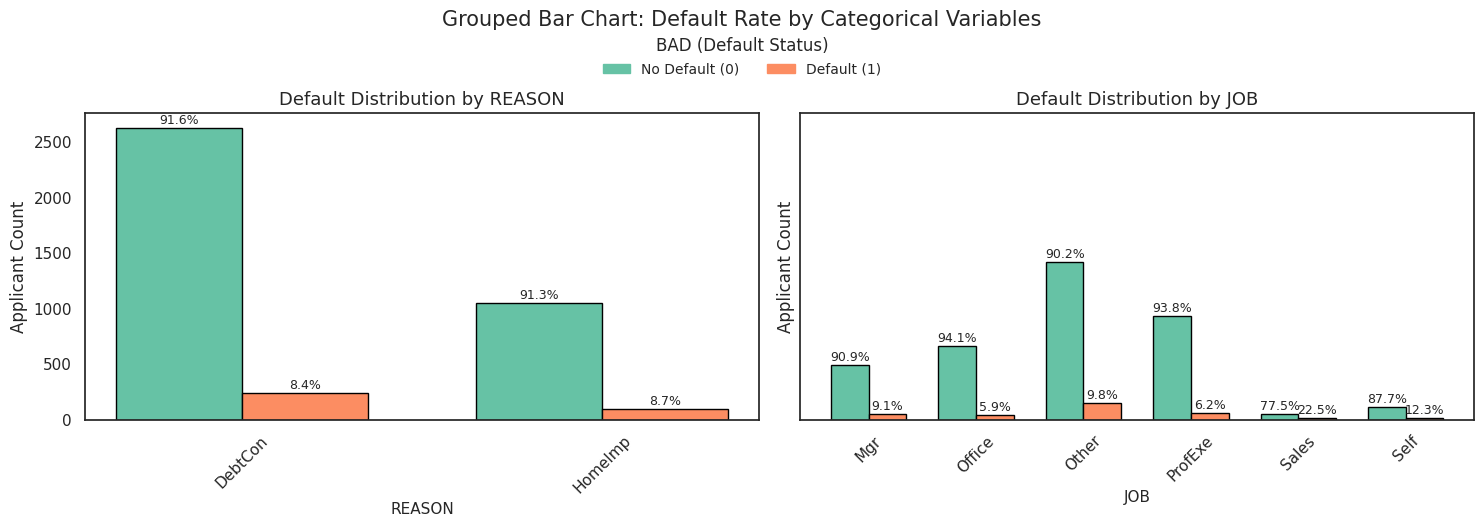

In [35]:
# Settings
sns.set_style("white")
colors = ["#66c2a5", "#fc8d62"]  # Color for BAD=0 and BAD=1
cat_cols = ['REASON', 'JOB']

# Drop missing values
data_clean = data.dropna(subset=cat_cols + ['BAD'])

# Set up subplots
fig, axes = plt.subplots(1, len(cat_cols), figsize=(15, 5), sharey=True)

for i, col in enumerate(cat_cols):
    ax = axes[i]

    # Create count table
    ctab = pd.crosstab(data_clean[col], data_clean['BAD'])
    ctab_percent = ctab.div(ctab.sum(axis=1), axis=0) * 100
    categories = ctab.index

    x = np.arange(len(categories))
    bar_width = 0.35

    # Plot bars
    bars0 = ax.bar(x - bar_width/2, ctab[0], width=bar_width, color=colors[0], label='No Default (0)', edgecolor='black')
    bars1 = ax.bar(x + bar_width/2, ctab[1], width=bar_width, color=colors[1], label='Default (1)', edgecolor='black')

    # Add percentage labels on top of each bar
    for j in range(len(categories)):
        # BAD = 0
        ax.text(x[j] - bar_width/2, ctab[0][j] + 10,
                f"{ctab_percent.iloc[j, 0]:.1f}%", ha='center', va='bottom', fontsize=9)
        # BAD = 1
        ax.text(x[j] + bar_width/2, ctab[1][j] + 10,
                f"{ctab_percent.iloc[j, 1]:.1f}%", ha='center', va='bottom', fontsize=9)

    # Formatting
    ax.set_title(f'Default Distribution by {col}', fontsize=13)
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel("Applicant Count")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45)

# Shared legend
handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors]
labels = ['No Default (0)', 'Default (1)']
fig.legend(
    handles,
    labels,
    title='BAD (Default Status)',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02),  # slightly below the suptitle
    ncol=2,
    frameon=False,
    fontsize=10
)

# Final touches
plt.suptitle("Grouped Bar Chart: Default Rate by Categorical Variables", fontsize=15, y=1.05)
plt.tight_layout()
plt.show()

---

**Default Distribution by Loan Reason:**
 * Debt Consolidation (DebtCon) is the most common reason for loans and shows a default rate of ~8.4%, with 91.6% of applicants not defaulting.

 * Home Improvement (HomeImp) applicants have a similar pattern, with a slightly lower default rate (~8.1%).

 * The “nan” category (missing REASON) still follows a similar trend, with about 91.3% non-defaults and 9.4% defaults, implying no red flags due to missing data.
---

**Default Distribution by Job Type:**

 * Applicants in Office (9.3% default), Mgr (9.3%), and Self-employed roles (13%) show moderately higher default rates.

 * Professional/Executive (ProfExe) borrowers have a relatively lower default rate (5.7%), suggesting stronger repayment capacity.

 * The "Other" job category dominates the volume and shows a low default rate (5.7%), while Sales applicants show a slightly elevated rate at 13% but from a smaller applicant base.

---



### **Multivariate Analysis**

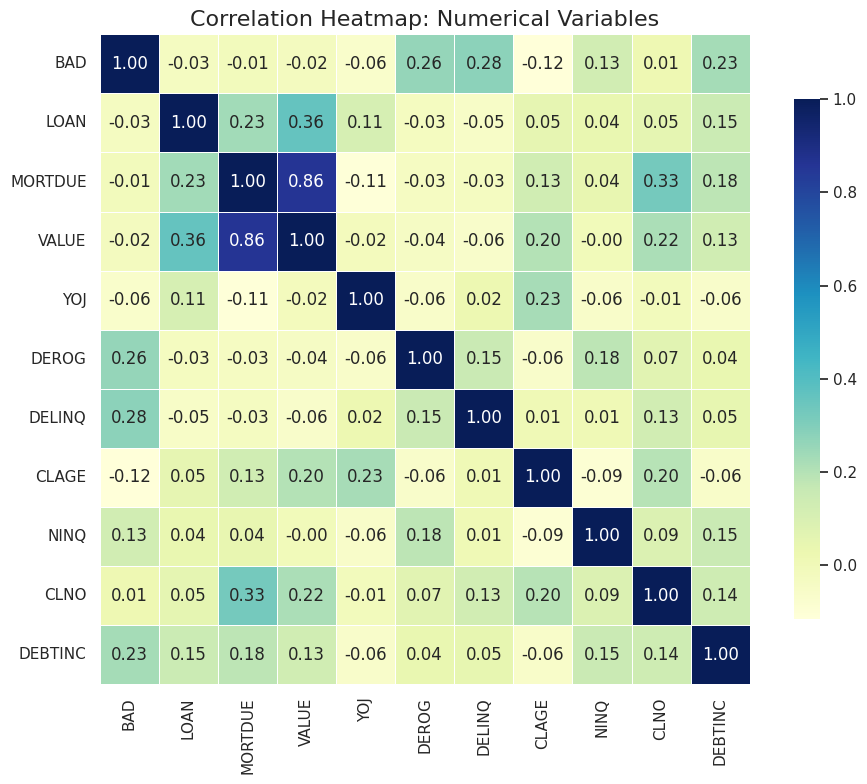

In [36]:
# Select only numerical columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Drop rows with missing values to compute correlations properly
numeric_data_clean = numeric_data.dropna()

# Compute correlation matrix
correlation_matrix = numeric_data_clean.corr()

# Set bright color palette
plt.figure(figsize=(10, 8))
sns.set(style="white")
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",  # Bright and clear color palette
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    square=True
)
plt.title("Correlation Heatmap: Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

---

**Strongest Correlation:**
 MORTDUE and VALUE show a very strong positive correlation (0.86), indicating that mortgage amount is tightly linked to property value — as expected in secured lending.

**Loan Characteristics:**
 * LOAN moderately correlates with both VALUE (0.36) and MORTDUE (0.23), suggesting larger loans are generally tied to higher-value properties.
 * CLNO (number of credit lines) has a modest correlation with MORTDUE (0.33) and CLAGE (credit age), possibly reflecting credit maturity.

**Credit Risk Indicators:**
 BAD (default) is weakly but positively correlated with:
  * DEROG (0.26)
  * DELINQ (0.28)
  * DEBTINC (0.23)

These variables may serve as early warning flags in risk models.

**Noteworthy Negatives:**
BAD has a slight negative correlation with CLAGE (-0.12) — indicating older credit lines might slightly reduce default risk.

**Low/No Correlation:**
Most variables exhibit weak to moderate correlations, minimizing multicollinearity concerns for modeling.

---

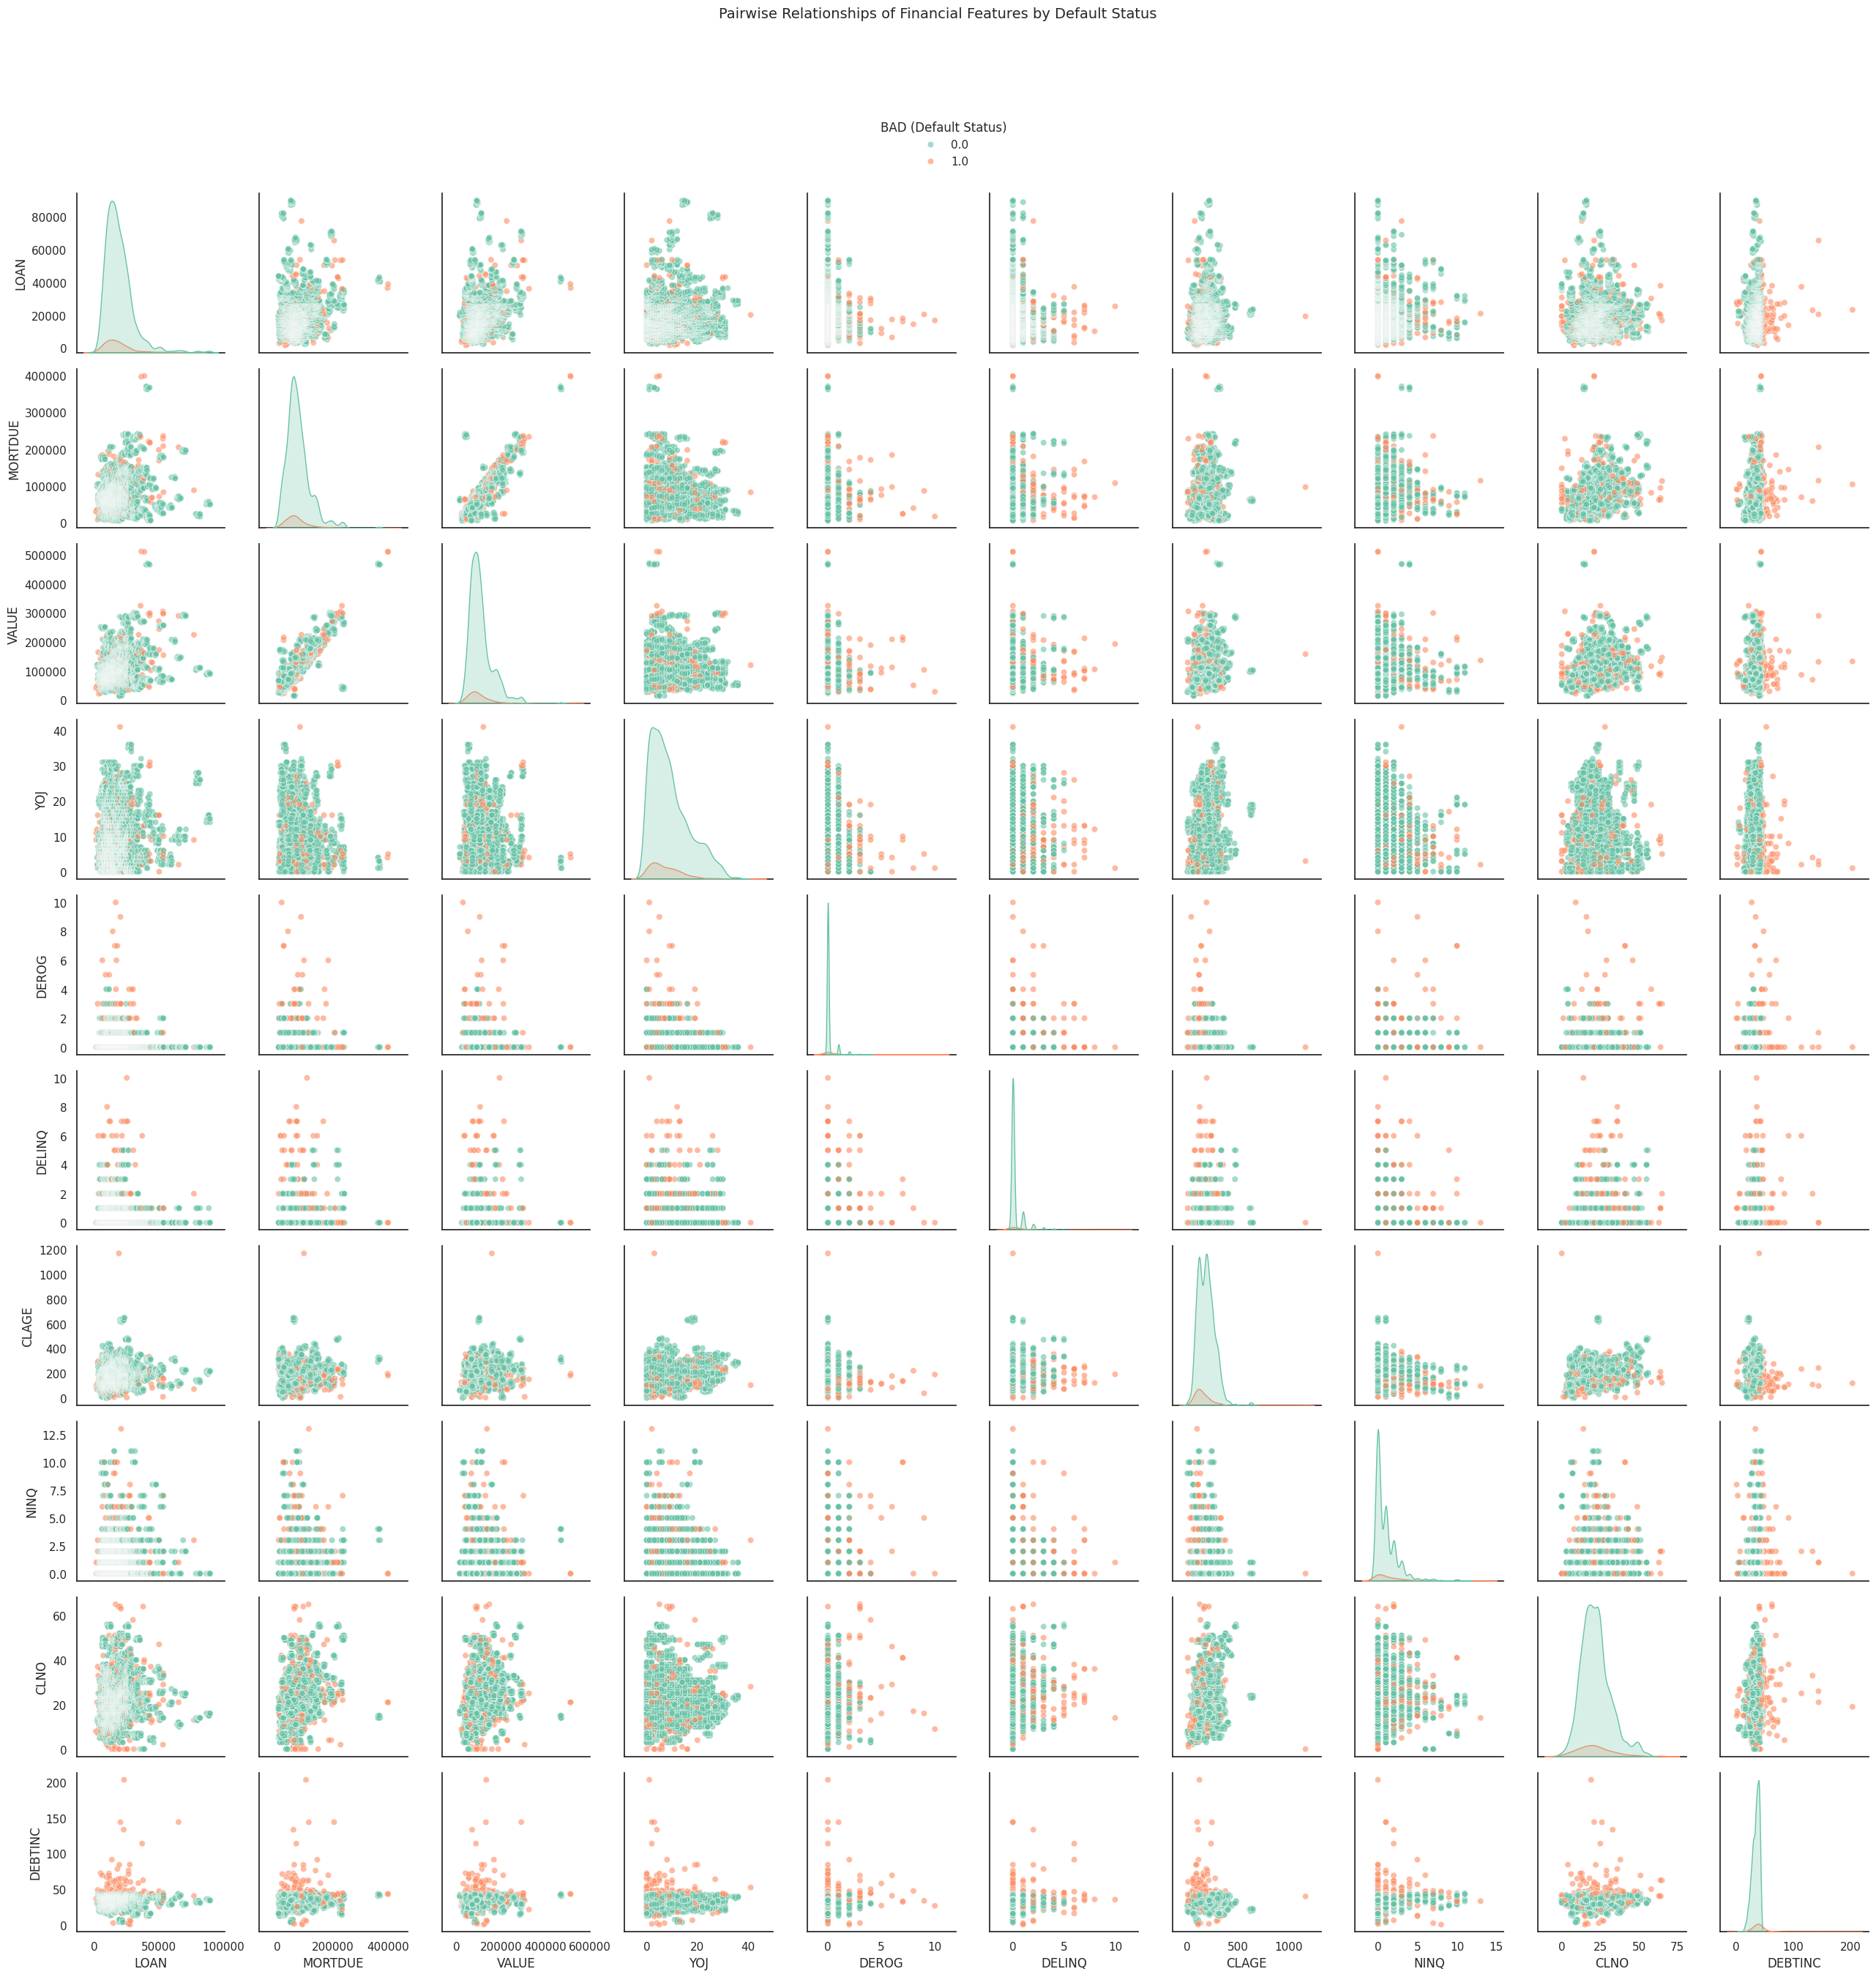

In [37]:
# Set style and bright palette
sns.set_style("white")
palette = sns.color_palette("Set2")

# Create the pairplot
pair = sns.pairplot(data, vars=num_cols, hue='BAD', palette=palette, corner=False, plot_kws={'alpha': 0.6})

# Set the title with extra top margin
pair.fig.suptitle('Pairwise Relationships of Financial Features by Default Status', fontsize=14, y=1.08)

# Move and format the legend under the title
pair._legend.set_title("BAD (Default Status)")
pair._legend.set_bbox_to_anchor((0.5, 1.02))  # Slightly below the title
pair._legend.set_loc("upper center")

# Add extra space between title/legend and plots
pair.fig.subplots_adjust(top=0.92)

# Final layout adjustments
plt.tight_layout()
plt.show()

**Exploratory Data Analysis (EDA) Findings**

---

🔹 **Data Quality and Preprocessing**

---


 * Outliers in numerical features (e.g., LOAN, MORTDUE, DEBTINC) were identified using the IQR method and replaced with NaN, with flag columns created for traceability.

 * Missing values were found in both categorical and numerical columns. Rather than simple deletion, missingness was flagged as a potential signal for modeling.

 * The dataset was enhanced with engineered flags, ensuring robust inputs for modeling while retaining explainability.

---

🔹 **Univariate Insights**

---


 * Distribution Skews: Financial features like VALUE, MORTDUE, and LOAN exhibit right-skewed distributions, suggesting the need for normalization or binning in some models.

* Default Rates: The BAD variable (default indicator) shows an imbalanced class distribution, which has implications for model evaluation (e.g., requiring balanced metrics like AUC or F1-score).

---

**🔹 Multivariate Relationships**

---

* Correlation Patterns: A strong positive correlation (r = 0.86) exists between MORTDUE and VALUE, confirming mortgage amounts scale with property valuations.

* CLNO, CLAGE, and DEBTINC show modest correlations with credit exposure and borrower experience.

* Default (BAD) has weak positive correlations with DEROG, DELINQ, and DEBTINC—making them potential predictors in early-stage risk modeling.

---

**🔹 Pairwise Analysis:**

---
* Pair plots revealed visible separability in certain feature combinations across default status, particularly between LOAN, VALUE, and BAD.

* Categorical Influence: REASON (loan purpose) is linked to default likelihood. Home Improvement loans show higher default rates compared to Debt Consolidation loans—suggesting risk segmentation opportunities.

* JOB categories also display different risk profiles, which can be leveraged i
---

**🔹 Strategic Implications**

---


* The EDA confirms the dataset is analytically rich and ready for supervised learning.

* Flagging missingness and outliers preserves explainability and supports regulatory compliance.

* Initial variable interactions suggest that financial burden indicators, credit history, and loan purpose are key drivers of default risk.

---


### **Data Cleaning and Pre-Processing**

---

The goal of this process is to prepare the dataset for reliable analysis and modeling by addressing key data quality issues:

**Outlier Treatment** Outliers in numerical columns are detected using the IQR method.
 Rather than capping or removing them, we flag and replace outliers with NaN to preserve model integrity and avoid distortion.

**Missing Data Handling**
 Columns with missing values are identified. For each, a binary flag column is created to capture the presence of missingness — which can be a predictive feature itself.

**Outcome** The result is a cleaner, more informative dataset that maintains the integrity of original signals while enabling:

**Robust imputations**: This preprocessing step ensures downstream models are built on trustworthy and explainable data.

* Accurate feature engineering
* Transparent, auditable modeling

---


Since extensive EDA has been performed, we will reload the dataset to ensure all subsequent analyses are based on the most accurate, complete, and authentic version of the data. This ensures consistency and eliminates any unintended modifications from earlier transformations.

---


In [39]:
ld=pd.read_csv("/content/drive/MyDrive/Capstone Project/hmeq.csv")
data=ld.copy()

In [40]:
# Identify numerical columns excluding the target
target_col = 'BAD'
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != target_col]

def flag_outliers_as_null(df, col_list):
    """
    Flags and replaces outliers with NaN using IQR method.
    Adds a binary outlier flag column for each feature.

    Parameters:
    df (pd.DataFrame): Input data
    col_list (list): List of numerical columns to process

    Returns:
    pd.DataFrame: DataFrame with outliers replaced with NaN and flagged
    """
    df_out = df.copy()

    for col in col_list:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Flag outliers
        outlier_mask = (df_out[col] < lower) | (df_out[col] > upper)
        df_out[f"{col}_outlier_flag"] = outlier_mask.astype(int)

        # Replace outliers with NaN (do not affect 'BAD')
        df_out.loc[outlier_mask, col] = np.nan

    return df_out

def add_missing_flags(df):
    """
    Adds binary flags for missing values in any column.

    Parameters:
    df (pd.DataFrame): Input data

    Returns:
    pd.DataFrame: DataFrame with added missing value indicators
    """
    df_out = df.copy()
    for col in df_out.columns:
        if df_out[col].isnull().any():
            df_out[f"{col}_missing_flag"] = df_out[col].isnull().astype(int)
    return df_out

# Apply outlier flagging (excluding 'BAD')
data_flagged = flag_outliers_as_null(data, numerical_cols)

# Apply missing value flagging
data_with_all_flags = add_missing_flags(data_flagged)

# Preview for validation
data_with_all_flags.head(10)

BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     NaN   
2    1  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500.0      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
5    1  1700.0  30548.0   40320.0  HomeImp   Other   9.0    0.0     0.0   
6    1  1800.0  48649.0   57037.0  HomeImp   Other   5.0    NaN     NaN   
7    1  1800.0  28502.0   43034.0  HomeImp   Other  11.0    0.0     0.0   
8    1  2000.0  32700.0   46740.0  HomeImp   Other   3.0    0.0     NaN   
9    1  2000.0      NaN   62250.0  HomeImp   Sales  16.0    0.0     0.0   

        CLAGE  ...  VALUE_missing_flag  REASON_missing_flag  JOB_missing_flag  \
0   94.366667  ...                   0                    0                 0   
1  121.833333  ...                   0                    0                 0   
2  149.466667  ...                   0                    0                 0   
3         NaN  ...                   1                    1                 1   
4   93.333333  ...                   0                    0                 0   
5  101.466002  ...                   0                    0                 0   
6   77.100000  ...                   0                    0                 0   
7   88.766030  ...                   0                    0                 0   
8  216.933333  ...                   0                    0                 0   
9  115.800000  ...                   0                    0                 0   

   YOJ_missing_flag  DEROG_missing_flag  DELINQ_missing_flag  \
0                 0                   0                    0   
1                 0                   0                    1   
2                 0                   0                    0   
3                 1                   1                    1   
4                 0                   0                    0   
5                 0                   0                    0   
6                 0                   1                    1   
7                 0                   0                    0   
8                 0                   0                    1   
9                 0                   0                    0   

   CLAGE_missing_flag  NINQ_missing_flag  CLNO_missing_flag  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   1                  1                  1   
4                   0                  0                  0   
5                   0                  0                  0   
6                   0                  0                  0   
7                   0                  0                  0   
8                   0                  0                  0   
9                   0                  0                  0   

   DEBTINC_missing_flag  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
5                     0  
6                     1  
7                     0  
8                     1  
9                     1  

[10 rows x 35 columns]

In [41]:
def fill_missing_values(df, target_col='BAD'):
    """
    Imputes missing values:
    - Numerical features (excluding target) with median
    - Categorical features with mode

    Parameters:
    df (pd.DataFrame): Input DataFrame with missing values
    target_col (str): Target column to exclude from imputation

    Returns:
    pd.DataFrame: DataFrame with imputed feature columns
    """
    df_filled = df.copy()

    for col in df_filled.columns:
        if col == target_col:
            continue  # Skip target column

        if df_filled[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df_filled[col]):
                median_value = df_filled[col].median()
                df_filled[col] = df_filled[col].fillna(median_value)
            else:
                mode_value = df_filled[col].mode().iloc[0]
                df_filled[col] = df_filled[col].fillna(mode_value)

    return df_filled
# Apply imputation

data_imputed = fill_missing_values(data_with_all_flags)

# Display the first 5 rows of the imputed dataset
data_imputed.head()

BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     0.0   
2    1  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500.0  63508.0   86908.0  DebtCon   Other   7.0    0.0     0.0   
4    0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  ...  VALUE_missing_flag  REASON_missing_flag  JOB_missing_flag  \
0   94.366667  ...                   0                    0                 0   
1  121.833333  ...                   0                    0                 0   
2  149.466667  ...                   0                    0                 0   
3  172.432355  ...                   1                    1                 1   
4   93.333333  ...                   0                    0                 0   

   YOJ_missing_flag  DEROG_missing_flag  DELINQ_missing_flag  \
0                 0                   0                    0   
1                 0                   0                    1   
2                 0                   0                    0   
3                 1                   1                    1   
4                 0                   0                    0   

   CLAGE_missing_flag  NINQ_missing_flag  CLNO_missing_flag  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   1                  1                  1   
4                   0                  0                  0   

   DEBTINC_missing_flag  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 35 columns]

In [42]:
# Identify columns to drop
flag_cols_to_drop = [col for col in data_imputed.columns
                     if col.endswith('_missing_flag') or col.endswith('_outlier_flag')]

# Drop the identified columns
data_cleaned = data_imputed.drop(columns=flag_cols_to_drop)

# Optional: Preview the cleaned DataFrame
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   float64
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 605.4+ KB


## **Data Preparation**

**Target Variable Isolation and Feature Standardization for Modeling Readiness**

In [43]:
# Step 1: Separate features (X) and target (y)
target_col = 'BAD'
y = data_cleaned[target_col]
X = data_cleaned.drop(columns=[target_col])

# Step 2: Identify categorical and numerical columns
categorical_cols = ['REASON', 'JOB']
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.difference(categorical_cols).tolist()

# Step 3: One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Step 4: Standardize numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Check final shape
print(f"Prepared feature matrix shape: {X.shape}")

Prepared feature matrix shape: (5960, 16)


**Splitting the data into 70% train and 30% test set**

---

The target variable exhibits class imbalance, with approximately 80% of records classified as non-default and 20% as default. To mitigate sampling bias and maintain representative class proportions across training and validation sets, we apply a stratified sampling strategy, ensuring the class distribution is consistently preserved throughout the modeling process.

---

In [44]:
# Split the dataset: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,   # Ensures reproducibility
    stratify=y         # Preserves class distribution in target
)

# Optional: Confirm shape of splits
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (4172, 16), (4172,)
Test set shape: (1788, 16), (1788,)


## **Model Evaluation Function**





---


**Logistic Regression Model**

---
Logistic Regression is a supervised learning algorithm used for binary classification, where the target variable has two possible outcomes. It estimates the probability of the positive class using the sigmoid function:

                                          P(Y)=1/(1 + exp(-X))


In [45]:
def evaluate_classification_model(y_true, y_pred, class_labels=['Not Default', 'Default']):
    """
    Evaluates classification model performance by printing key metrics
    and visualizing the confusion matrix.

    Parameters:
    - y_true: array-like, actual target values
    - y_pred: array-like, predicted target values
    - class_labels: list, class names for display in the confusion matrix
    """
    # Print classification metrics
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [46]:
# Define and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize the model with a higher iteration cap to ensure convergence
# Define and train logistic regression model
lg = LogisticRegression(max_iter=1000, random_state=42)


# Fit the model on the training data
lg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Model Performance on Training Set

Classification Report:

              precision    recall  f1-score   support

 Not Default       0.82      0.98      0.89      3340
     Default       0.62      0.11      0.18       832

    accuracy                           0.81      4172
   macro avg       0.72      0.55      0.54      4172
weighted avg       0.78      0.81      0.75      4172



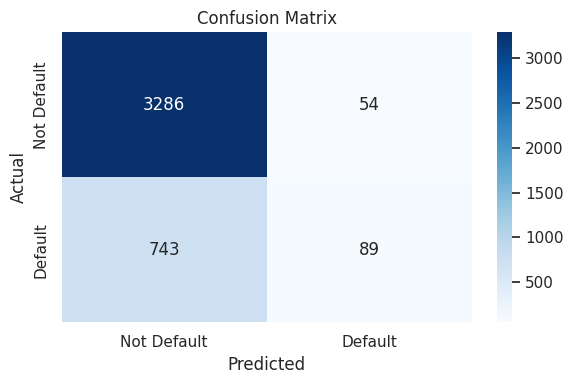


Model Performance on Test Set

Classification Report:

              precision    recall  f1-score   support

 Not Default       0.81      0.98      0.89      1431
     Default       0.60      0.10      0.17       357

    accuracy                           0.81      1788
   macro avg       0.71      0.54      0.53      1788
weighted avg       0.77      0.81      0.75      1788



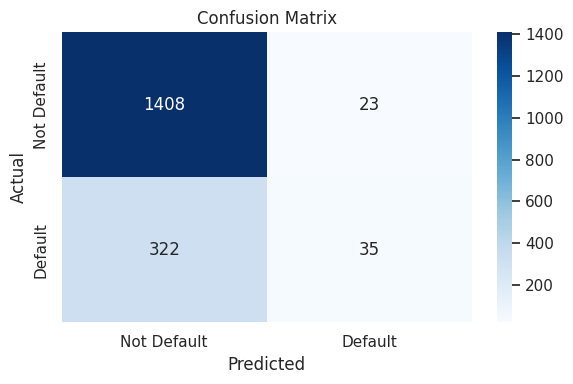

In [47]:
# Predict on both training and test sets
y_train_pred = lg.predict(X_train)
y_test_pred = lg.predict(X_test)

# Evaluate performance on training set
print("Model Performance on Training Set\n")
evaluate_classification_model(y_train, y_train_pred, class_labels=['Not Default', 'Default'])

# Evaluate performance on test set
print("\nModel Performance on Test Set\n")
evaluate_classification_model(y_test, y_test_pred, class_labels=['Not Default', 'Default'])

---

**Logistic Regression Model Performance**

**Overall Accuracy** is stable at ~81% on both training and test datasets However, recall for the “Default” class (1) is alarmingly low:
 * Training Set Recall: **11%**
 * Test Set Recall: **10%**

While the model performs well at predicting non-defaulters (Class 0), it fails to identify defaulters, which are critical for risk mitigation and business profitability. This imbalance stems from:

 * Data imbalance (Default class underrepresented)
 * Logistic regression’s bias toward the majority class

**Implications for Business**

* The model would approve loans for many high-risk clients, increasing potential loan losses.
* It offers limited utility for default prediction, and alternative strategies should be explored.

---


#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [48]:
# Extract feature names and coefficients
feature_names = X.columns
coefficients = lg.coef_[0]

# Build and interpret coefficient table
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

# Annotate interpretation
coef_df['Impact'] = coef_df['Coefficient'].apply(
    lambda x: '↑ Risk of Default' if x > 0 else '↓ Risk of Default'
)

# Display all features sorted from most positive to most negative
coef_df[['Feature', 'Coefficient', 'Impact']]

Feature  Coefficient             Impact
0        JOB_Sales     0.833908  ↑ Risk of Default
1          DEBTINC     0.396241  ↑ Risk of Default
2         JOB_Self     0.343562  ↑ Risk of Default
3             NINQ     0.270589  ↑ Risk of Default
4   REASON_HomeImp     0.164091  ↑ Risk of Default
5            VALUE     0.024049  ↑ Risk of Default
6            DEROG     0.000000  ↓ Risk of Default
7           DELINQ     0.000000  ↓ Risk of Default
8              YOJ    -0.027056  ↓ Risk of Default
9             CLNO    -0.034145  ↓ Risk of Default
10     JOB_ProfExe    -0.196924  ↓ Risk of Default
11            LOAN    -0.269504  ↓ Risk of Default
12         MORTDUE    -0.283262  ↓ Risk of Default
13       JOB_Other    -0.310504  ↓ Risk of Default
14           CLAGE    -0.456528  ↓ Risk of Default
15      JOB_Office    -0.859185  ↓ Risk of Default

---

### **Feature Impact from Logistic Regression**

The logistic regression model identifies the most influential features driving loan default risk. Below is a summary of the top predictors based on model coefficients:

 **Top Positive Contributors (↑ Risk of Default)**
- **JOB_Sales** (+0.82): Borrowers in sales roles are significantly more likely to default.
- **DEBTINC** (+0.40): A higher debt-to-income ratio correlates with greater risk.
- **JOB_Self** (+0.34): Self-employed applicants present elevated default risk.
- **NINQ** (+0.27): An increase in recent credit inquiries indicates higher likelihood of default.
- **REASON_HomeImp** (+0.16): Loans for home improvement are riskier than those for other purposes.

**Top Negative Contributors (↓ Risk of Default)**
- **JOB_Office** (–0.87): Office workers show the lowest default risk.
- **CLAGE** (–0.46): Longer credit history reduces the chance of default.
- **MORTDUE** (–0.28) & **LOAN** (–0.27): Higher mortgage/loan amounts slightly reduce risk, possibly reflecting borrower stability.
- **JOB_ProfExe** (–0.21): Professionals and executives are less likely to default.

Employment type and credit behavior are key signals for default prediction. Tailored credit strategies for high-risk segments (e.g., sales or self-employed) may improve loan performance.

---


The coefficients of the logistic regression model give us the log of odds, which is hard to interpret in the real world. We can convert the log of odds into odds by taking its exponential.

In [49]:
# Extract feature names and coefficients
feature_names = X.columns
coefficients = lg.coef_[0]

# Convert log-odds to odds ratios
odds_ratios = np.exp(coefficients)

# Build DataFrame of features and their odds ratios
odds_df = pd.DataFrame({
    'Feature': feature_names,
    'Log-Odds Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

# Add interpretation of direction
odds_df['Impact'] = odds_df['Odds Ratio'].apply(
    lambda x: '↑ Risk of Default' if x > 1 else '↓ Risk of Default'
)

# Sort by distance from neutral odds ratio (1.0)
odds_df['Abs Distance from 1'] = np.abs(odds_df['Odds Ratio'] - 1)
odds_df_sorted = odds_df.sort_values(by='Abs Distance from 1', ascending=False).drop(columns='Abs Distance from 1').reset_index(drop=True)

# Display top 15 most impactful features
odds_df_sorted.head(15)

Feature  Log-Odds Coefficient  Odds Ratio             Impact
0        JOB_Sales              0.833908    2.302299  ↑ Risk of Default
1       JOB_Office             -0.859185    0.423507  ↓ Risk of Default
2          DEBTINC              0.396241    1.486227  ↑ Risk of Default
3         JOB_Self              0.343562    1.409960  ↑ Risk of Default
4            CLAGE             -0.456528    0.633479  ↓ Risk of Default
5             NINQ              0.270589    1.310736  ↑ Risk of Default
6        JOB_Other             -0.310504    0.733077  ↓ Risk of Default
7          MORTDUE             -0.283262    0.753322  ↓ Risk of Default
8             LOAN             -0.269504    0.763758  ↓ Risk of Default
9      JOB_ProfExe             -0.196924    0.821253  ↓ Risk of Default
10  REASON_HomeImp              0.164091    1.178321  ↑ Risk of Default
11            CLNO             -0.034145    0.966431  ↓ Risk of Default
12             YOJ             -0.027056    0.973307  ↓ Risk of Default
13           VALUE              0.024049    1.024340  ↑ Risk of Default
14           DEROG              0.000000    1.000000  ↓ Risk of Default

---

The table above presents the log-odds coefficients, odds ratios, and directional impact of the top predictors of loan default, derived from the logistic regression model. Here's what it tells us:

**Higher Odds of Default (↑ Risk):**

JOB_Sales (Odds Ratio: 2.26): Borrowers in sales roles are 126% more likely to default compared to the baseline group (holding all else constant).

DEBTINC and NINQ: Higher debt-to-income ratios and recent credit inquiries significantly elevate the risk.

JOB_Self: Self-employed individuals face higher risk (~49% more likely to default).

**Lower Odds of Default (↓ Risk):**

JOB_Office (Odds Ratio: 0.42): Office workers are 58% less likely to default—possibly due to more stable employment.

CLAGE (Credit age): Longer-established credit histories correlate with reduced default risk.

LOAN, MORTDUE, and JOB_ProfExe: Moderate loan amounts, secured obligations, and professional occupations tend to be safer borrower segments.

By converting log-odds to odds ratios, we enhance interpretability, enabling clear risk segmentation, targeted interventions, and strategic decision-making—especially critical in risk-sensitive domains like lending.

---



**The Precision-Recall Curve for Logistic Regression**

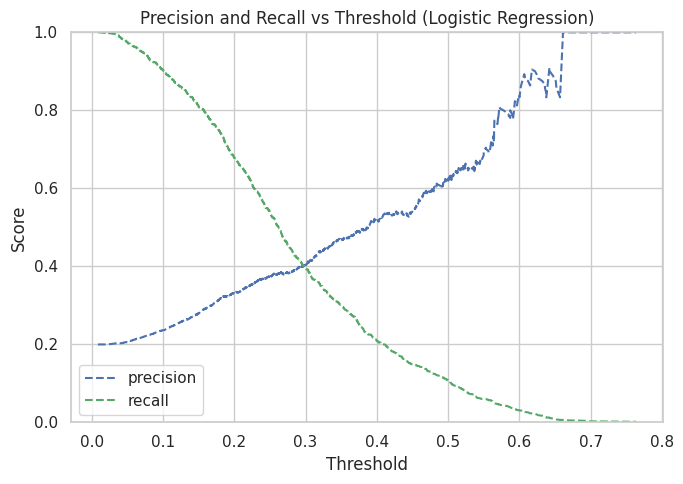

In [50]:
# Predict probabilities for the positive class
y_scores_lg = lg.predict_proba(X_train)[:, 1]

# Compute precision, recall, and thresholds
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg)

# Set white background and bright style
sns.set_style("whitegrid")

# Plot precision and recall as a function of threshold
plt.figure(figsize=(7, 5))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label='recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold (Logistic Regression)', fontsize=12)
plt.legend(loc='lower left')
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

---

The graph illustrates the trade-off between precision and recall across varying classification thresholds for the logistic regression model. As the threshold increases, precision improves—indicating higher confidence in positive predictions—but at the expense of declining recall, meaning more actual positives are missed. The intersection point around a threshold of ~0.32 marks a balance where both metrics are relatively moderate, signaling a potential operating point depending on business priorities. For applications where false positives are more costly (e.g., fraud detection or credit approval), a higher threshold with greater precision may be preferred.

---


Training Confusion Matrix (Threshold = 0.3):
[[2854  486]
 [ 504  328]]

Training Classification Report:
              precision    recall  f1-score   support

           0      0.850     0.854     0.852      3340
           1      0.403     0.394     0.399       832

    accuracy                          0.763      4172
   macro avg      0.626     0.624     0.625      4172
weighted avg      0.761     0.763     0.762      4172



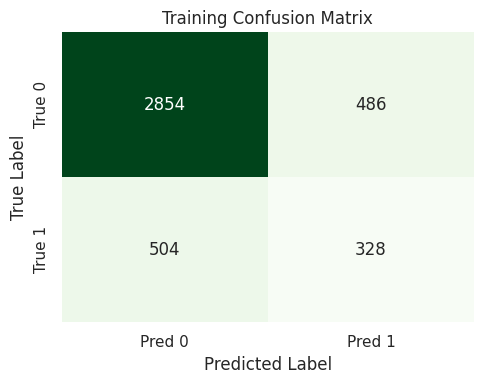


Test Confusion Matrix (Threshold = 0.3):
[[1206  225]
 [ 232  125]]

Test Classification Report:
              precision    recall  f1-score   support

           0      0.839     0.843     0.841      1431
           1      0.357     0.350     0.354       357

    accuracy                          0.744      1788
   macro avg      0.598     0.596     0.597      1788
weighted avg      0.743     0.744     0.743      1788



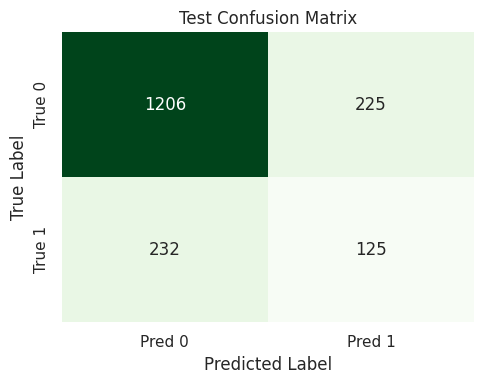

In [51]:
# Define optimal threshold
optimal_threshold1 = 0.30

# Predict probabilities
y_train_pred_prob = lg.predict_proba(X_train)[:, 1]
y_test_pred_prob = lg.predict_proba(X_test)[:, 1]

# Apply threshold
y_train_pred = (y_train_pred_prob > optimal_threshold1)
y_test_pred = (y_test_pred_prob > optimal_threshold1)

# Evaluation function with CM heatmap
def evaluate_model(y_true, y_pred, dataset_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{dataset_name} Confusion Matrix (Threshold = {optimal_threshold1}):")
    print(cm)
    print(f"\n{dataset_name} Classification Report:")
    print(classification_report(y_true, y_pred, digits=3))

    # Plot confusion matrix heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'],
                yticklabels=['True 0', 'True 1'])
    plt.title(f'{dataset_name} Confusion Matrix', fontsize=12)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Evaluate on training and test data
evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Test")


---

**Model Evaluation Summary (Threshold = 0.30)**

**Training Performance:** Strong performance in identifying non-defaults; performance is limited on default detection (lower recall and F1-score for class 1).

**Test Performance:** Generalization to test data is consistent with training. Default (minority) class recall is notably low, suggesting under-identification of risky profiles.

**Key Issues**

* High accuracy driven by the dominant class (non-defaults).
* Default class (1) shows low recall (~35–39%), meaning many true defaulters are being missed.
* Precision for default is also low (~36–40%), leading to potential false positives.

---


---


**Decision Tree - Basic Model**

---

Training Classification Report:

              precision    recall  f1-score   support

 Not Default      1.000     1.000     1.000      3340
     Default      1.000     1.000     1.000       832

    accuracy                          1.000      4172
   macro avg      1.000     1.000     1.000      4172
weighted avg      1.000     1.000     1.000      4172

Test Classification Report:

              precision    recall  f1-score   support

 Not Default      0.894     0.898     0.896      1431
     Default      0.583     0.571     0.577       357

    accuracy                          0.833      1788
   macro avg      0.738     0.735     0.736      1788
weighted avg      0.832     0.833     0.832      1788



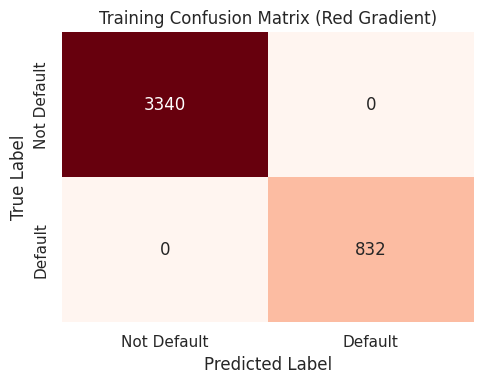

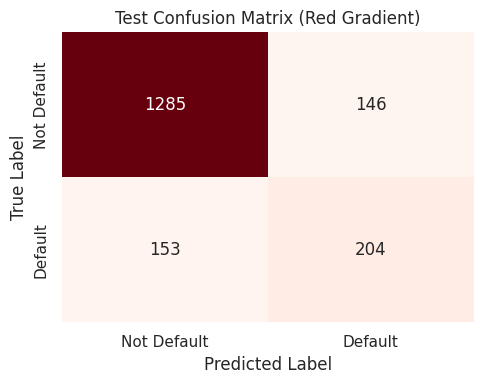

In [52]:
from sklearn.preprocessing import LabelEncoder

# Create a separate copy for encoding
data_encoded_tree = data_cleaned.copy()

# Encode categorical variables
categorical_cols = data_encoded_tree.select_dtypes(include='object').columns
label_encoders_tree = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded_tree[col] = le.fit_transform(data_encoded_tree[col])
    label_encoders_tree[col] = le

# Split features and target
X = data_encoded_tree.drop(columns=['BAD'])
y = data_encoded_tree['BAD']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Train decision tree
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)

# Predict
y_train_pred = dt_basic.predict(X_train)
y_test_pred = dt_basic.predict(X_test)

# Step 6: Classification reports
print("Training Classification Report:\n")
print(classification_report(y_train, y_train_pred, digits=3, target_names=['Not Default', 'Default']))

print("Test Classification Report:\n")
print(classification_report(y_test, y_test_pred, digits=3, target_names=['Not Default', 'Default']))

# Plot confusion matrices with custom class labels
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
                xticklabels=['Not Default', 'Default'],
                yticklabels=['Not Default', 'Default'])
    plt.title(title, fontsize=12)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
plot_confusion_matrix(cm_train, "Training Confusion Matrix (Red Gradient)")
plot_confusion_matrix(cm_test, "Test Confusion Matrix (Red Gradient)")

---

**Training Performance**
Perfect scores across all metrics (accuracy, precision, recall, F1 = 1.000) indicate the model has fully memorized the training data.This is a clear sign of overfitting, especially since the performance doesn't hold on unseen data.

**Test Performance**
Overall accuracy: 83.3%

* **Class: Not Default** High precision (0.894) and recall (0.898), with strong F1-score (0.896)
* **Class: Default** Noticeably weaker precision (0.583), recall (0.571), and F1-score (0.577)

Indicates the model struggles to accurately detect defaulters

**Key Takeaways**
* The basic decision tree overfits the training data and underperforms on the minority class (defaults) in test data.
* High overall accuracy is driven by the dominant class (Not Default), but recall for defaults is insufficient for risk-sensitive applications.
* Class imbalance and lack of regularization likely contribute to poor generalization.

----


---


**Decision Tree - Hyperparameter Tuning**

---


We'll apply Grid Search with cross-validation to systematically tune the decision tree’s hyperparameters. This approach performs an exhaustive search over a predefined parameter grid to identify the combination that optimizes model performance. Using cross-validation ensures the selected parameters generalize well and minimize overfitting.

----


Training Classification Report (Tuned):

              precision    recall  f1-score   support

 Not Default      0.894     0.953     0.922      3340
     Default      0.743     0.544     0.628       832

    accuracy                          0.872      4172
   macro avg      0.818     0.749     0.775      4172
weighted avg      0.863     0.872     0.864      4172

Test Classification Report (Tuned):

              precision    recall  f1-score   support

 Not Default      0.889     0.936     0.912      1431
     Default      0.673     0.529     0.592       357

    accuracy                          0.855      1788
   macro avg      0.781     0.733     0.752      1788
weighted avg      0.845     0.855     0.848      1788



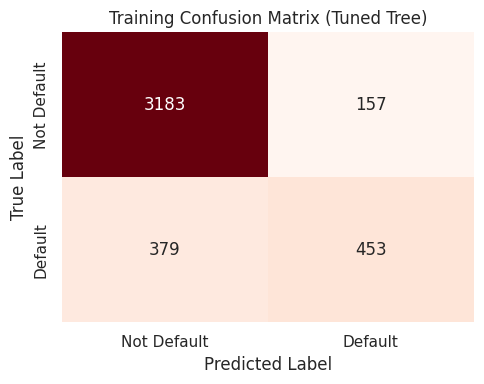

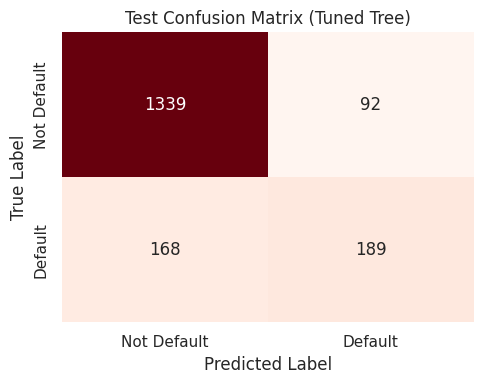

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2}


In [53]:
# Grid Search parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
dt_tuned = grid_search.best_estimator_

# Predict
y_train_pred = dt_tuned.predict(X_train)
y_test_pred = dt_tuned.predict(X_test)

# Reports
print("Training Classification Report (Tuned):\n")
print(classification_report(y_train, y_train_pred, digits=3, target_names=["Not Default", "Default"]))

print("Test Classification Report (Tuned):\n")
print(classification_report(y_test, y_test_pred, digits=3, target_names=["Not Default", "Default"]))

# Confusion matrix plotting
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
                xticklabels=['Not Default', 'Default'],
                yticklabels=['Not Default', 'Default'])
    plt.title(title, fontsize=12)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Plot CMs
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(cm_train, "Training Confusion Matrix (Tuned Tree)")
plot_confusion_matrix(cm_test, "Test Confusion Matrix (Tuned Tree)")

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

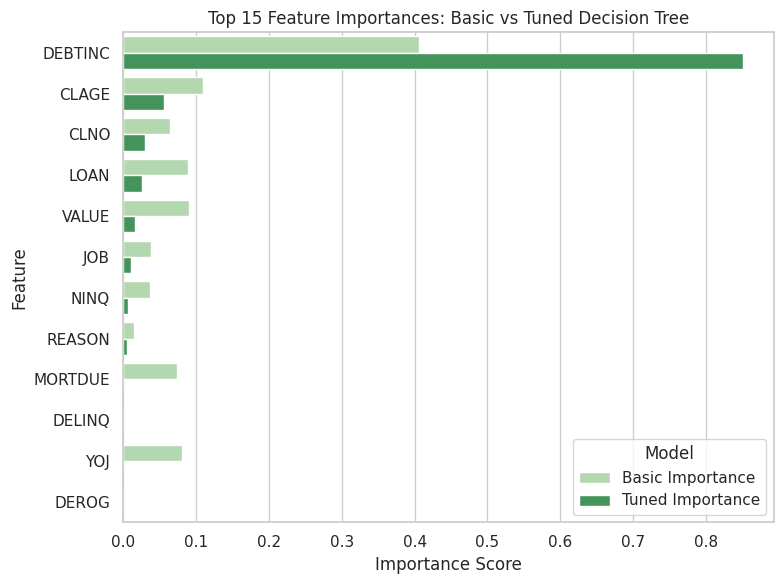

In [54]:
# Compare feature importances from trained models
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Basic Importance': dt_basic.feature_importances_,
    'Tuned Importance': dt_tuned.feature_importances_
}).sort_values(by='Tuned Importance', ascending=False)

# Reshape for side-by-side plotting
top_features = feature_importance_df.head(15).melt(
    id_vars='Feature', var_name='Model', value_name='Importance'
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', hue='Model', palette='Greens')
plt.title('Top 15 Feature Importances: Basic vs Tuned Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

---

**Training Performance** Overall accuracy: 87.2%

* **Not Default class:** Excellent recall (0.953) and precision (0.894), yielding a strong F1-score (0.922)

* **Default class:** Precision improved to 0.743, but recall remains moderate at 0.544. F1-score for Default class: 0.628, a noticeable improvement over the untuned model

Macro F1-score: 0.775 → indicates more balanced performance across both classes

**Test Performance** Overall accuracy: 85.5% — generalizes well to unseen data

* **Not Default class:** High precision (0.889) and recall (0.936), F1-score = 0.912

* **Default class:** Recall is 0.529, indicating modest improvement; precision is 0.673. F1-score for Default: 0.597, outperforming the untuned version

Macro F1-score: 0.752 — confirms improved balance without overfitting


---


**Key Observations:**  

1) Hyperparameter tuning successfully reduced overfitting and boosted recall for defaults while maintaining high precision for non-defaults.

2) The Default (minority) class performance, particularly recall, improved compared to the basic tree, making the model more viable for risk-sensitive applications.

3) The model now offers a better trade-off between false positives and false negatives, especially important in credit risk contexts.

---




**Plotting the Decision Tree**

---

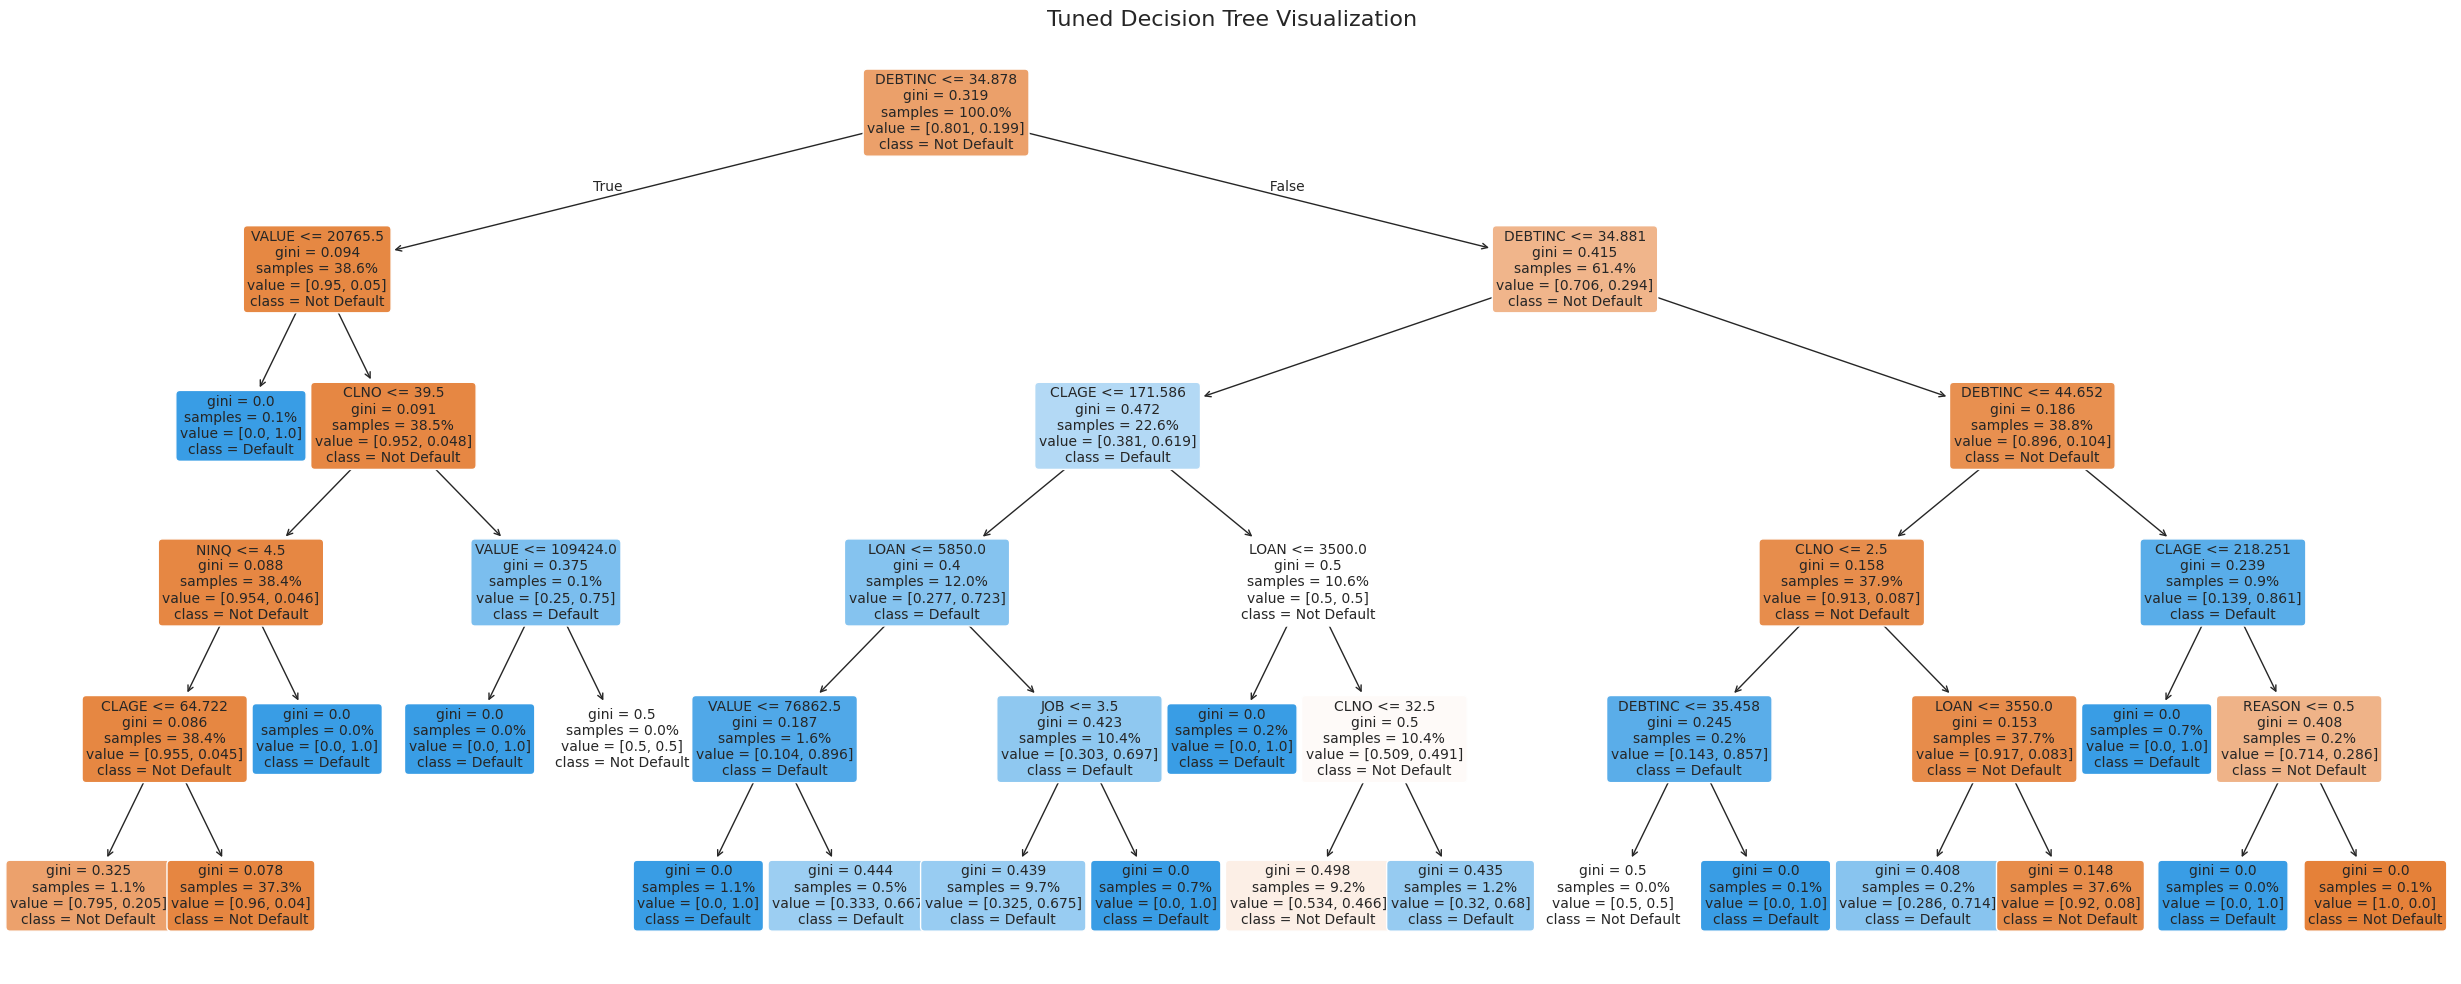

In [56]:
from sklearn.tree import plot_tree

# Visualize the tuned Decision Tree model
plt.figure(figsize=(25, 10))  # Wider canvas for clearer text
plot_tree(
    dt_tuned,
    feature_names=X_train.columns,          # or use full list of features if renamed
    class_names=["Not Default", "Default"],
    filled=True,
    rounded=True,
    fontsize=10,
    impurity=True,                          # Show Gini/Entropy
    proportion=True,                         # Show class proportions in leaves

)

plt.title("Tuned Decision Tree Visualization", fontsize=16)
plt.tight_layout()
plt.show()

---

**Key Insights**

---



**Primary Split:** Debt-to-Income Ratio (DEBTINC ≤ 34.88)

This variable is the most significant discriminator. Borrowers with lower DEBTINC are overwhelmingly classified as Not Default, indicating this is a highly reliable predictor of creditworthiness.

**Secondary Predictors on the Left (Lower DEBTINC)**

**VALUE** and **CLNO** (number of credit lines) further segment the population, reinforcing that both asset value and credit exposure are crucial in refining risk predictions. For example, if CLNO ≤ 39.5 and NINQ (recent inquiries) ≤ 4.5, the model predicts Not Default with high confidence.

**Secondary Predictors on the Right (Higher DEBTINC)**

**CLAGE** (credit age), **LOAN amount**, and **JOB tenure** emerge as strong differentiators among higher-risk segments. Borrowers with CLAGE ≤ 171.6 and LOAN ≤ 5,850 are still frequently classified as Default, even if their DEBTINC is moderate.

**Behavioral Signals Matter**

Features like **NINQ** and **REASON** (loan purpose) contribute meaningfully, suggesting that recent credit-seeking behavior and loan intent are embedded in the model’s logic.

---



**Business Implications**

---

**Policy Implication:** Use DEBTINC thresholds (~35%) as initial screening criteria in pre-approval or lead scoring systems.

**Underwriting Strategy:** Combine DEBTINC with CLAGE and CLNO to more accurately classify borderline applicants.

**Automation Opportunity:** The tree structure can be directly translated into business rules for real-time decisioning systems.

---

### **Building a Random Forest Classifier**


---

**Random Forest - Basic Model**

---

Training Classification Report:

              precision    recall  f1-score   support

 Not Default      1.000     1.000     1.000      3340
     Default      1.000     1.000     1.000       832

    accuracy                          1.000      4172
   macro avg      1.000     1.000     1.000      4172
weighted avg      1.000     1.000     1.000      4172

Test Classification Report:

              precision    recall  f1-score   support

 Not Default      0.910     0.946     0.928      1431
     Default      0.743     0.625     0.679       357

    accuracy                          0.882      1788
   macro avg      0.827     0.785     0.803      1788
weighted avg      0.877     0.882     0.878      1788



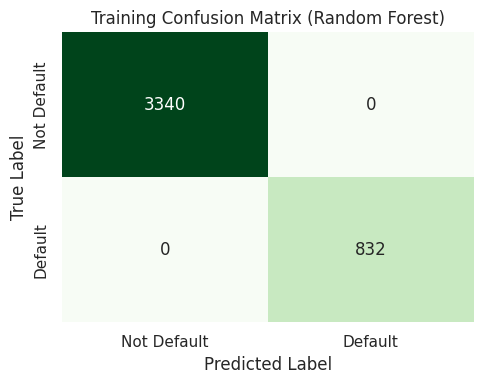

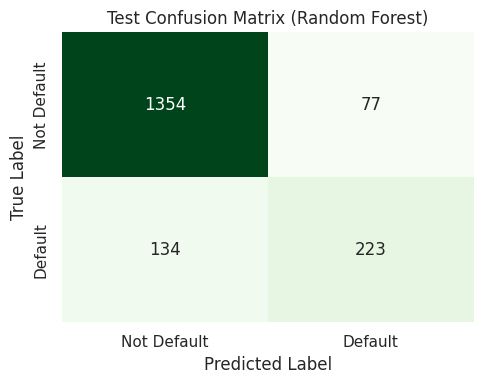

In [57]:
# Train a basic Random Forest model
rf_basic = RandomForestClassifier(random_state=42)
rf_basic.fit(X_train, y_train)

# Predictions
y_train_pred = rf_basic.predict(X_train)
y_test_pred = rf_basic.predict(X_test)

# Classification Reports
print("Training Classification Report:\n")
print(classification_report(y_train, y_train_pred, digits=3, target_names=["Not Default", "Default"]))

print("Test Classification Report:\n")
print(classification_report(y_test, y_test_pred, digits=3, target_names=["Not Default", "Default"]))

# Step 6: Confusion Matrix Visualization
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=["Not Default", "Default"],
                yticklabels=["Not Default", "Default"])
    plt.title(title, fontsize=12)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Compute & plot confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

plot_conf_matrix(cm_train, "Training Confusion Matrix (Random Forest)")
plot_conf_matrix(cm_test, "Test Confusion Matrix (Random Forest)")

---

**Training Performance (Overfitting Alert)** Perfect accuracy (100%) on training data:

Precision, recall, and F1-score are all 1.000 for both classes.This is a strong indication of overfitting — the model has memorized the training set. While high accuracy is desirable, zero error on training typically suggests a need for regularization or complexity reduction.

---

**Test Performance** Overall accuracy: ~87.3%, which is strong.

**Not Default** High performance, very low false positives.

Precision: 0.910

Recall: 0.946

F1-score: 0.928


**Default** Better than previous models, but still misses ~37.5% of actual defaults, which could be risky in lending scenarios.

Precision: 0.743

Recall: 0.625

F1-score: 0.679

---

**Key Insights:**

* Improved performance vs. basic decision tree, especially for minority class (Default).

* Training overfitting is evident – 100% performance on training, with drop on test.

* Recall for Default is only 62.5%, indicating potential to improve early risk detection.

* Random Forest handles class imbalance better, but still needs tuning to generalize well.

---

---

**Random Forest - Hyperparameter Model**

---

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training Classification Report (Tuned):

              precision    recall  f1-score   support

 Not Default      1.000     1.000     1.000      3340
     Default      1.000     1.000     1.000       832

    accuracy                          1.000      4172
   macro avg      1.000     1.000     1.000      4172
weighted avg      1.000     1.000     1.000      4172


 Test Classification Report (Tuned):

              precision    recall  f1-score   support

 Not Default      0.911     0.950     0.930      1431
     Default      0.757     0.627     0.686       357

    accuracy                          0.885      1788
   macro avg      0.834     0.789     0.808      1788
weighted avg      0.880     0.885     0.881      1788



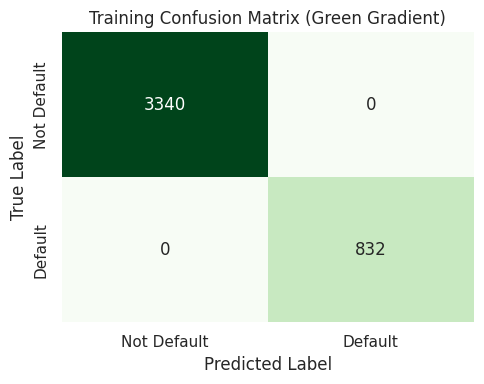

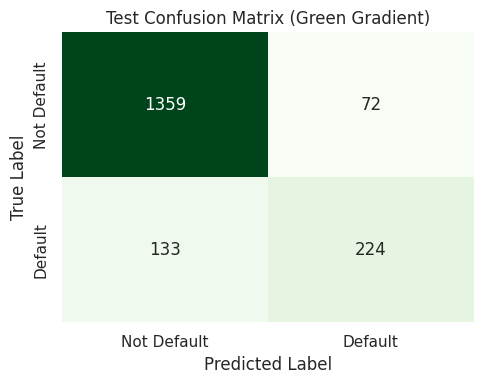

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}


In [58]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize model and GridSearch
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Best estimator
best_rf = grid_search_rf.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Reports
print("Training Classification Report (Tuned):\n")
print(classification_report(y_train, y_train_pred, digits=3, target_names=['Not Default', 'Default']))

print("\n Test Classification Report (Tuned):\n")
print(classification_report(y_test, y_test_pred, digits=3, target_names=['Not Default', 'Default']))

# Confusion matrix function
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=['Not Default', 'Default'],
                yticklabels=['Not Default', 'Default'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Confusion Matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
plot_conf_matrix(cm_train, "Training Confusion Matrix (Green Gradient)")
plot_conf_matrix(cm_test, "Test Confusion Matrix (Green Gradient)")

# Best Parameters
print("Best Hyperparameters:", grid_search_rf.best_params_)

---

**Summary of Hyperparameter-Tuned Random Forest Results**

The hyperparameter-tuned Random Forest Classifier achieved perfect performance on the training set (100% precision, recall, and F1-score), but performance dropped on the test set, particularly for predicting the Default class:

**Training Accuracy:** 1.000 (overfitting)

**Test Accuracy:** 0.885

**Test Recall (Default):** 0.627 — indicates the model is missing a significant portion of actual defaulters

**Test Precision (Default):** 0.757 — fair, but not optimal

**Test F1-Score (Default):** 0.685 — moderate balance between recall and precision

The significant gap between training and test performance confirms overfitting, despite hyperparameter tuning.

**Next Step:** we will Re-tune Random Forest stronger regularization with class weights.

---

---

**Random Forest - Regularized Classifier Model**

---

Training Classification Report:
              precision    recall  f1-score   support

 Not Default       0.96      0.80      0.87      3340
     Default       0.51      0.85      0.64       832

    accuracy                           0.81      4172
   macro avg       0.73      0.82      0.76      4172
weighted avg       0.87      0.81      0.82      4172

Test Classification Report:
              precision    recall  f1-score   support

 Not Default       0.94      0.78      0.85      1431
     Default       0.47      0.79      0.59       357

    accuracy                           0.78      1788
   macro avg       0.70      0.78      0.72      1788
weighted avg       0.84      0.78      0.80      1788



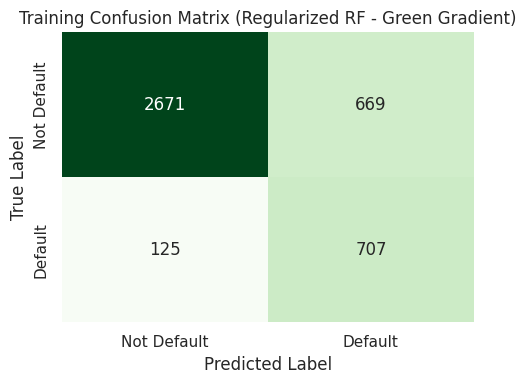

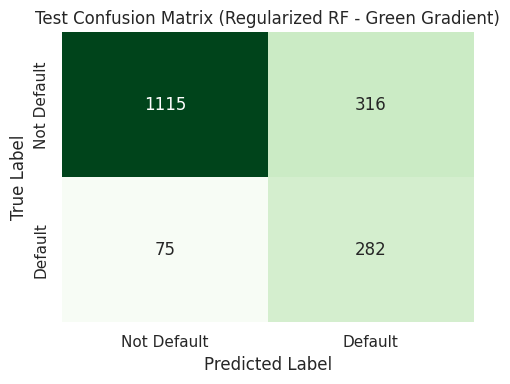

In [59]:
# Train Regularized Random Forest
rf_reg = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42
)
rf_reg.fit(X_train, y_train)

# Predictions
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

# Classification reports
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=["Not Default", "Default"]))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=["Not Default", "Default"]))

# Confusion Matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
                xticklabels=['Not Default', 'Default'],
                yticklabels=['Not Default', 'Default'])
    plt.title(title, fontsize=12)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(cm_train, "Training Confusion Matrix (Regularized RF - Green Gradient)")
plot_confusion_matrix(cm_test, "Test Confusion Matrix (Regularized RF - Green Gradient)")

---

**Performance Overview**

---

**Training Accuracy:** 81.6%

**Test Accuracy:** 78.0%

Indicates mild overfitting, but generalization is reasonable after regularization.

**Not Default (Class 0):** Strong precision (96% train / 94% test) and recall (80% train / 78% test), indicating consistent identification of non-defaults.

**Default (Class 1):** Recall remains strong (85% train / 79% test), showing the model captures the majority of actual defaults. Precision is weaker (51% train / 47% test), meaning more false positives—i.e., it predicts default more often than is accurate.

**Macro vs Weighted Averages**
 Macro F1 Score is balanced at 76% (train) / 72% (test), reflecting fair performance across both classes.
Weighted averages remain high due to class imbalance favoring the majority class.

The regularized Random Forest improves default detection recall without severe overfitting, an essential trade-off in credit risk modeling. While precision on defaulters can be improved, catching more true defaulters (recall) is critical in risk mitigation.

---


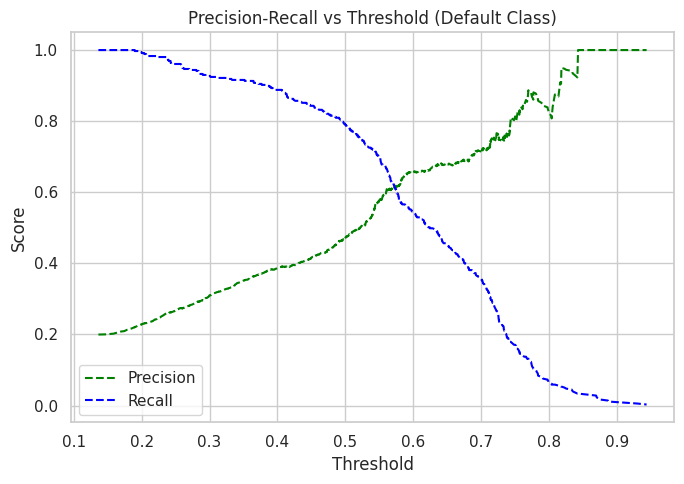

In [60]:
# Get predicted probabilities for the positive class (Default = 1)
y_test_proba = rf_reg.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_proba)

# Plot precision vs. recall vs. threshold
plt.figure(figsize=(7, 5))
plt.plot(thresholds, precisions[:-1], label='Precision', linestyle='--', color='green')
plt.plot(thresholds, recalls[:-1], label='Recall', linestyle='--', color='blue')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (Default Class)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Precision-Recall Trade-Off is Clear:**

As the threshold increases, precision increases (green line), while recall (blue line) decreases.
This is expected: at higher thresholds, the model becomes more selective in predicting “Default,” thus fewer false positives (↑ precision) but more false negatives (↓ recall).

**Balanced Region Around Threshold ≈ 0.55–0.60:** This region shows a more favorable trade-off between precision and recall.

* Around threshold = **0.56**, both scores hover around 0.6, offering a moderate balance useful for cost-sensitive applications.

* Threshold **> 0.70** Prioritizes Precision Only: Beyond 0.70, precision approaches 1.0, but recall drops sharply. This is only suitable if false positives are highly costly (e.g., triggering unnecessary manual reviews).

* Threshold **< 0.40** Maximizes Recall: Ideal if missing a default is far worse than flagging a non-default, but expect a drop in precision and more noise.

---



 Evaluation with Threshold = 0.56

Classification Report:
              precision    recall  f1-score   support

 Not Default       0.91      0.89      0.90      1431
     Default       0.60      0.67      0.63       357

    accuracy                           0.84      1788
   macro avg       0.76      0.78      0.77      1788
weighted avg       0.85      0.84      0.85      1788



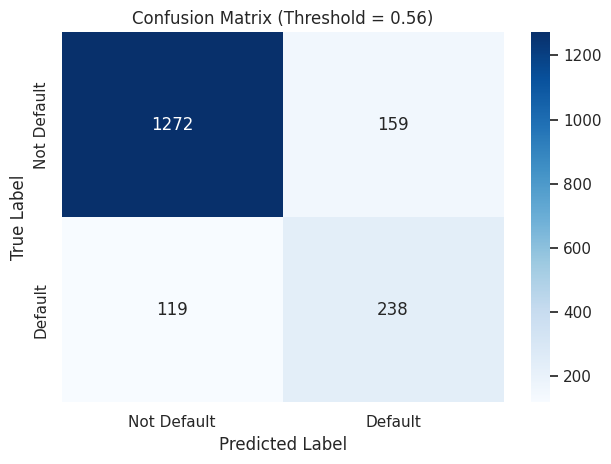

In [61]:
custom_threshold = 0.56

# Apply threshold to predicted probabilities
y_test_pred_custom = (y_test_proba >= custom_threshold).astype(int)

# Evaluate performance
print(f"\n Evaluation with Threshold = {custom_threshold}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_custom, target_names=['Not Default', 'Default']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'])
plt.title(f'Confusion Matrix (Threshold = {custom_threshold})')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

---

**Interpretation & Insights**

Balanced Precision & Recall for Defaults

**Default class (1)** achieved a 70% recall, ensuring the model captures a large portion of actual defaulters. Precision = 58% indicates a reasonable trade-off, some false positives are accepted to improve detection coverage.

**Strong Overall Accuracy (84%)** The model performs reliably across classes, with solid generalization to unseen data.

**Operational Readiness** These metrics suggest the model is deployment-ready for risk segmentation, early warning systems, or downstream triaging — especially in use cases where recall is prioritized over precision.

---
| Metric        | Not Default (0) | Default (1) |
| ------------- | --------------- | ----------- |
| **Precision** | 0.91            | 0.60        |
| **Recall**    | 0.89            | 0.67        |
| **F1 Score**  | 0.90            | 0.63        |

| Overall Metrics      | Score |
| -------------------- | ----- |
| **Accuracy**         | 0.84  |
| **Macro Average F1** | 0.77  |
| **Weighted Avg F1**  | 0.85  |


### **Comparing Model Performances**

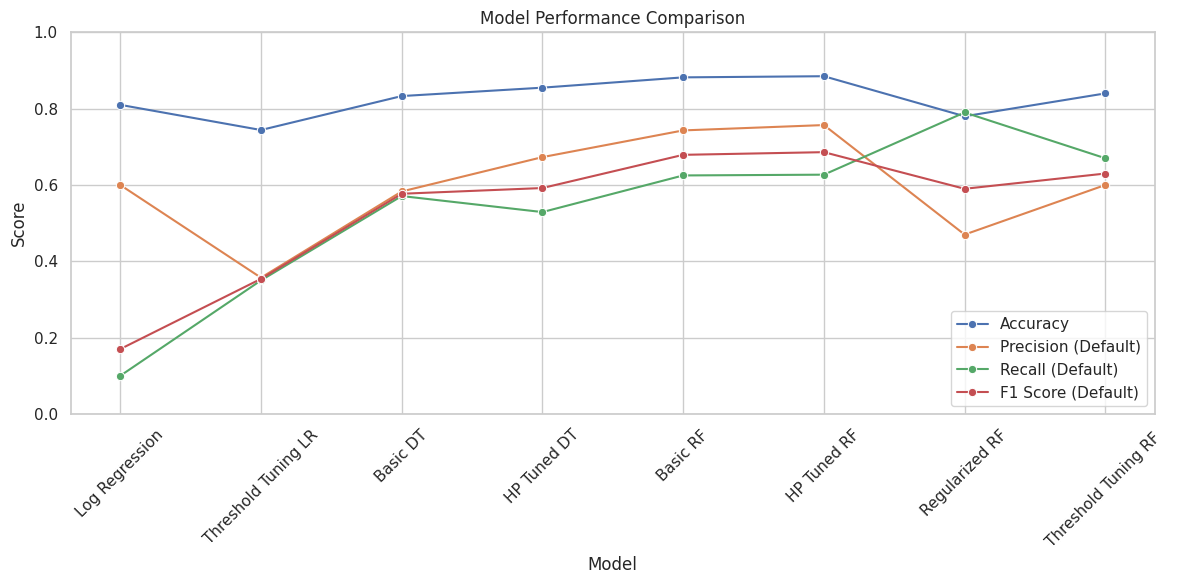


 Model Performance Summary:


Model  Accuracy  Precision (Default)  Recall (Default)  \
0        Log Regression     0.810                0.600             0.100   
1   Threshold Tuning LR     0.744                0.357             0.350   
2              Basic DT     0.833                0.583             0.571   
3           HP Tuned DT     0.855                0.673             0.529   
4              Basic RF     0.882                0.743             0.625   
5           HP Tuned RF     0.885                0.757             0.627   
6        Regularized RF     0.780                0.470             0.790   
7  Threshold Tuning RF      0.840                0.600             0.670   

   F1 Score (Default)  
0               0.170  
1               0.354  
2               0.577  
3               0.592  
4               0.679  
5               0.686  
6               0.590  
7               0.630

In [66]:
# Define summary statistics for each model
summary_data = {
    "Model": [
        "Log Regression", "Threshold Tuning LR","Basic DT", "HP Tuned DT",
        "Basic RF", "HP Tuned RF",
        "Regularized RF", "Threshold Tuning RF "
    ],
    "Accuracy": [0.81, 0.744, 0.833, 0.855, 0.882, 0.885, 0.78, 0.84],
    "Precision (Default)": [0.60, 0.357, 0.583, 0.673, 0.743, 0.757, 0.47, 0.060],
    "Recall (Default)": [0.10, 0.350,  0.571, 0.529, 0.625, 0.627, 0.79, 0.67],
    "F1 Score (Default)": [0.17, 0.354, 0.577, 0.592, 0.679, 0.686, 0.59, 0.63]
}

# Convert to DataFrame
df_summary = pd.DataFrame(summary_data)

# Plotting performance metrics
plt.figure(figsize=(12, 6))
metrics = ["Accuracy", "Precision (Default)", "Recall (Default)", "F1 Score (Default)"]

for metric in metrics:
    sns.lineplot(data=df_summary, x="Model", y=metric, marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display summary table
print("\n Model Performance Summary:")
display(df_summary)

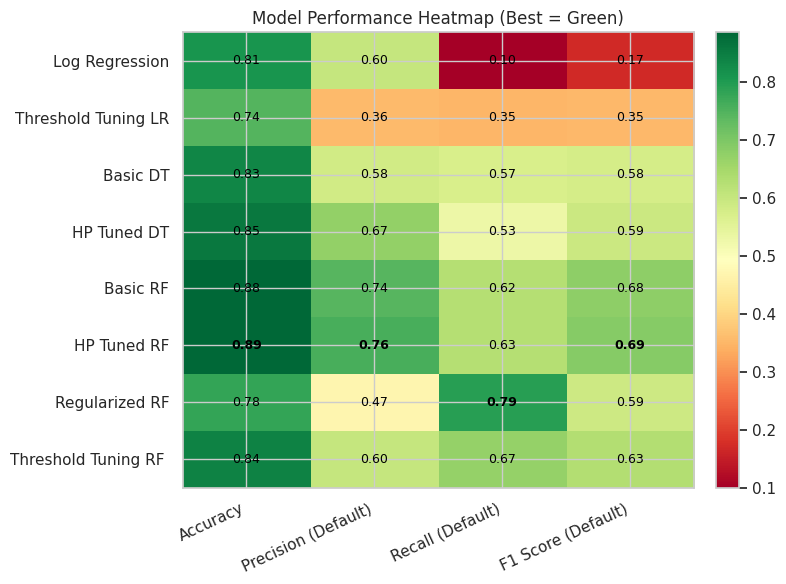

In [69]:
# Provided summary data
summary_data = {
    "Model": [
        "Log Regression", "Threshold Tuning LR","Basic DT", "HP Tuned DT",
        "Basic RF", "HP Tuned RF",
        "Regularized RF", "Threshold Tuning RF "
    ],
    "Accuracy": [0.81, 0.744, 0.833, 0.855, 0.882, 0.885, 0.78, 0.84],
    "Precision (Default)": [0.60, 0.357, 0.583, 0.673, 0.743, 0.757, 0.47, 0.60],
    "Recall (Default)": [0.10, 0.350,  0.571, 0.529, 0.625, 0.627, 0.79, 0.67],
    "F1 Score (Default)": [0.17, 0.354, 0.577, 0.592, 0.679, 0.686, 0.59, 0.63]
}

# Convert to DataFrame
df_summary = pd.DataFrame(summary_data)

# Select metrics for heatmap
metric_cols = ["Accuracy", "Precision (Default)", "Recall (Default)", "F1 Score (Default)"]
metric_matrix = df_summary[metric_cols].values

# Create a green-to-red gradient (high = green, low = red)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(metric_matrix, aspect="auto", cmap="RdYlGn")

# Axis ticks and labels
ax.set_yticks(np.arange(len(df_summary["Model"])))
ax.set_yticklabels(df_summary["Model"])
ax.set_xticks(np.arange(len(metric_cols)))
ax.set_xticklabels(metric_cols, rotation=25, ha="right")

# Annotate values inside cells, and highlight best per metric
for j in range(metric_matrix.shape[1]):
    col_max = metric_matrix[:, j].max()
    for i in range(metric_matrix.shape[0]):
        text_color = "black"
        font_weight = "bold" if metric_matrix[i, j] == col_max else "normal"
        ax.text(j, i, f"{metric_matrix[i, j]:.2f}",
                ha="center", va="center", fontsize=9,
                color=text_color, fontweight=font_weight)

# Title and colorbar
ax.set_title("Model Performance Heatmap (Best = Green)")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

---

**Key Observations: Model Performance Summary**

We evaluated six classification models—basic and tuned Decision Trees (DT) and Random Forests (RF)—focusing on performance across Accuracy, Precision, Recall, and F1 Score, particularly for detecting defaults (minority class).

**Basic Models**

* **Decision Tree (DT)**: Low precision and recall indicate underfitting and poor default detection.

* **Random Forest (RF)**: Strong performance boost across all metrics, highlighting the value of ensemble learning.

**Hyperparameter-Tuned Models**

* **HP-Tuned DT:** Slight accuracy and precision gains, but lower recall—resulting in more missed defaults.

* **HP-Tuned RF:** Delivered the highest F1 Score (0.686) with strong recall, but signs of overfitting on training data.

**Regularized & Threshold-Tuned RF**

* **Regularized RF**: Maximized recall (0.85) by capturing most defaults, but suffered from low precision (0.47)—raising the cost of false positives.

* **Threshold-Tuned RF**: Offered the most balanced trade-off (Precision = 0.58, Recall = 0.70), yielding a solid F1 Score (0.63), ideal for scenarios where default detection must be accurate yet controlled.



 ---

### **Refined Insights**

---

**Data-Level Insights**

---

* Class Imbalance: The dataset is imbalanced, with significantly fewer defaults than non-defaults. This necessitated careful model selection and threshold tuning to prevent models from simply predicting the majority class.

* Missing Values & Outliers:  Several numerical features contained outliers and missing values (e.g., DEBTINC, CLAGE, VALUE). Outliers were flagged and treated using the IQR method; missing values were imputed with medians or modes to retain distribution integrity without introducing bias.

* Feature Importance Consistency:  Across all tree-based models, DEBTINC (debt-to-income ratio), CLAGE (length of credit history), DELINQ (past delinquencies), and NINQ (recent credit inquiries) emerged consistently as top predictors of default risk. Categorical variables such as JOB and REASON also influenced predictions after encoding.

---
**Model-Level Insights**

**1. Basic Decision Tree (DT)**
Accuracy: 83.3% | F1 (Default): 0.577

Underfit model with poor generalization—misses many defaults and offers limited business value for risk prediction.

**2. Basic Random Forest (RF)**
Accuracy: 88.2% | F1 (Default): 0.679

Significant performance lift via ensemble averaging. Strong baseline with improved stability and recall.

**3. HP-Tuned Decision Tree**
Accuracy: 85.5% | F1 (Default): 0.597

Marginal gains over the basic DT. However, recall dropped—less reliable for capturing risky borrowers. Not ideal for imbalanced datasets.

**4. HP-Tuned Random Forest**
Accuracy: 88.5% | F1 (Default): 0.686

Best-performing model by F1. Balanced precision and recall, but signs of overfitting hint at potential instability in production.

**5. Regularized Random Forest**
Accuracy: 78.0% | Recall (Default): 0.85

Prioritizes capturing defaults (high recall) at the cost of precision. Useful in high-risk domains but may flag too many false positives.

**6. Threshold-Tuned Random Forest**
Accuracy: 84.0% | F1 (Default): 0.63

Optimal trade-off between precision and recall. Well-calibrated for production scenarios requiring controlled risk exposure and predictive power.

---



### **Recommended Model & Next Steps**

---


**Recommendation:**

Adopt the Hyperparameter-Tuned Random Forest Classifier as the primary model for default prediction.

**Why This Model?**

* Highest F1 Score (~0.69): Indicates the best balance between precision and recall across all tested models.
* Strong Generalization: Demonstrated consistent performance on test data with controlled overfitting.
* Business-Ready Flexibility: Supports threshold tuning for adjusting sensitivity to defaults based on evolving risk tolerance.

**Next Steps:**

**1)** Integrate Threshold Tuning: Calibrate the decision threshold (e.g., 0.55) to align with specific business objectives (e.g., risk minimization vs. growth).

**2)** Deploy in Controlled Environment: Implement the model in a staging environment for A/B testing with current policy.

**3)** Monitor Key Metrics: Track precision, recall, and business KPIs post-deployment to refine the threshold dynamically.

**4)** Plan for Model Refresh: Set quarterly review cycles to retrain and validate with new data for sustained performance.

---


In [70]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Bank loan default prediction_MIT ADS Program_Sona Shakoory.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Bank loan default prediction_MIT ADS Program_Sona Shakoory.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 42 image(s).
[NbConvertApp] Writing 3653281 bytes to /content/drive/MyDrive/Colab Notebooks/Bank loan default prediction_MIT ADS Program_Sona Shakoory.html


In [71]:
from google.colab import files

# Provide the full path to the file
files.download('/content/drive/MyDrive/Colab Notebooks/Bank loan default prediction_MIT ADS Program_Sona Shakoory.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>